
# Part I - Analysis of Prosper Loan Data  
## by Oluwaseyi Ogundimu

## Table of Content
<ul>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#uni-eda">Univariate Exploration</a></li>
<li><a href="#bi-eda">Bivariate Exploration</a></li>
<li><a href="#multi-eda">Multivariate Exploration</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction
Prosper which was founded in 2005 is a peer-to-peer online lending marketplace in the United States. Borrowers apply online for a fixed-rate, fixed-term loan and investors (individual or institutional) can fund anywhere from $\$$2,000 to $\$$40,000 per loan request to earn returns. These investors can consider borrowers credit scores, ratings, history and the category of the loan.  
As these loans are unsecured(require no collateral), prosper verifies borrowers' identities and select personal data before funding loans.

<a id = 'wrangling'></a>
## Preliminary Wrangling

In [140]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

sb.set_style('darkgrid')
%matplotlib inline

### Data Gathering

In [141]:
loan = pd.read_csv('prosperLoanData.csv')

### Data Assessment
#### Visual Assessment

In [142]:
loan

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


#### Programmatic Assessment

In [143]:
loan.sample(15)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
40146,B54B3595612060853F542C2,1039073,2013-11-29 22:15:10.817000000,NaN,36,Current,NaN,0.23438,0.1970,0.1870,...,-5.80,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
76787,F612359452830008262D880,1030641,2013-11-11 09:24:08.820000000,NaN,36,Current,NaN,0.21699,0.1800,0.1700,...,-9.86,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
11721,176036007702405282B3318,1159859,2014-01-24 15:18:37.547000000,NaN,60,Current,NaN,0.16662,0.1435,0.1335,...,-15.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,54
21046,C9003591664595780BDC55E,935551,2013-10-03 12:43:52.803000000,NaN,60,Current,NaN,0.15783,0.1349,0.1249,...,-32.97,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
112236,F33F3430127682069FD82FD,394598,2008-09-08 08:07:16.863000000,C,36,Completed,2009-12-23 00:00:00,0.37453,0.3500,0.3400,...,-72.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,80
31050,F93E35906341217230287C6,935823,2013-09-28 11:59:20.703000000,NaN,36,Current,NaN,0.14409,0.1159,0.1059,...,-16.26,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
28137,B38835567892862729CED91,635376,2012-09-07 11:53:05.553000000,NaN,60,Completed,2013-01-18 00:00:00,0.29464,0.2684,0.2584,...,-37.25,0.0,0.0,0.0,0.0,1.0,0,0,0.0,17
46591,1A473584596934214BC8694,845352,2013-07-20 09:42:28.913000000,NaN,36,Current,NaN,0.28780,0.2492,0.2392,...,-22.17,0.0,0.0,0.0,0.0,1.0,0,0,0.0,2
27575,015B34104749786000BD341,269636,2008-01-22 13:16:42.127000000,A,36,Completed,2011-01-31 00:00:00,0.11543,0.1100,0.1000,...,-155.72,0.0,0.0,0.0,0.0,1.0,0,0,0.0,347
84208,A40334104759125552951A6,263262,2008-01-10 20:39:44.450000000,D,36,Completed,2009-05-29 00:00:00,0.08987,0.0776,0.0676,...,-11.30,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [144]:
loan.shape

(113937, 81)

In [145]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [146]:
loan.nunique()

ListingKey                     113066
ListingNumber                  113066
ListingCreationDate            113064
CreditGrade                         8
Term                                3
                                ...  
PercentFunded                     719
Recommendations                    17
InvestmentFromFriendsCount         14
InvestmentFromFriendsAmount       726
Investors                         751
Length: 81, dtype: int64

In [147]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [148]:
loan.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [149]:
loan.ListingKey.duplicated().sum()

871

### Initial Details Noted from Assessment
* duplicates in ListingKey column.
* unneeded columns in Dataframe.
* column names with mixed characters.
* listingcategory column with unclear values.
* ratings scattered across 2 columns for loans before 2009 and those after 2009
* arrangement of ordinal(categorical) features.

### Data Cleaning

In [150]:
loans = loan.copy()

#### 1. Duplicates in ListingKey
##### Define:  remove duplicates from data.

##### Code

In [151]:
# creating a mask containing duplicates
dups = loans[loans.ListingKey.duplicated()]
dups

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.17710,0.1535,0.1435,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2539,2D2635984503681189056B4,1097584,2014-01-11 07:50:08.037000000,NaN,60,Current,NaN,0.14528,0.1224,0.1124,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4942,4B7E3590031274113F1FD34,927246,2013-09-26 09:35:36.317000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,-15.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,40
5812,94B035909835592957503E6,920397,2013-09-24 13:27:48.287000000,NaN,36,Current,NaN,0.24205,0.2045,0.1945,...,-37.03,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113548,FB6A35999320129979DBBA3,1158474,2014-01-23 14:33:25.967000000,NaN,60,Current,NaN,0.22063,0.1960,0.1860,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113636,D9BF3589576999233477E75,904020,2013-09-17 11:44:43.177000000,NaN,36,Current,NaN,0.21290,0.1760,0.1660,...,-9.86,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113733,E2303594522341016B8EE15,1002326,2013-11-07 14:26:31.317000000,NaN,60,Current,NaN,0.20593,0.1819,0.1719,...,-24.94,0.0,0.0,0.0,0.0,1.0,0,0,0.0,66
113773,DE8535960513435199406CE,1056749,2013-12-06 05:43:13.830000000,NaN,36,Current,NaN,0.16324,0.1274,0.1174,...,-16.79,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [152]:
dups.index

Int64Index([     9,    999,   2539,   4942,   5812,   5971,   6385,   7415,
              7538,   7555,
            ...
            113218, 113356, 113386, 113431, 113468, 113548, 113636, 113733,
            113773, 113863],
           dtype='int64', length=871)

In [153]:
# dropping duplicates
loans.drop(dups.index, axis = 0, inplace = True)

##### Test

In [154]:
loans.ListingKey.duplicated().sum()

0

#### 2. Column names with mixed characters
##### Define: convert column names to lowercase.

##### Code

In [155]:
loans.columns = loans.columns.str.lower()

##### Test

In [156]:
loans.head(0)

,listingkey,listingnumber,listingcreationdate,creditgrade,term,loanstatus,closeddate,borrowerapr,borrowerrate,lenderyield,...,lp_servicefees,lp_collectionfees,lp_grossprincipalloss,lp_netprincipalloss,lp_nonprincipalrecoverypayments,percentfunded,recommendations,investmentfromfriendscount,investmentfromfriendsamount,investors


#### 3.  Unneeded Columns in Dataframe
##### Define:

##### Code

In [157]:
loans.columns

Index(['listingkey', 'listingnumber', 'listingcreationdate', 'creditgrade',
       'term', 'loanstatus', 'closeddate', 'borrowerapr', 'borrowerrate',
       'lenderyield', 'estimatedeffectiveyield', 'estimatedloss',
       'estimatedreturn', 'prosperrating (numeric)', 'prosperrating (alpha)',
       'prosperscore', 'listingcategory (numeric)', 'borrowerstate',
       'occupation', 'employmentstatus', 'employmentstatusduration',
       'isborrowerhomeowner', 'currentlyingroup', 'groupkey',
       'datecreditpulled', 'creditscorerangelower', 'creditscorerangeupper',
       'firstrecordedcreditline', 'currentcreditlines', 'opencreditlines',
       'totalcreditlinespast7years', 'openrevolvingaccounts',
       'openrevolvingmonthlypayment', 'inquirieslast6months', 'totalinquiries',
       'currentdelinquencies', 'amountdelinquent', 'delinquencieslast7years',
       'publicrecordslast10years', 'publicrecordslast12months',
       'revolvingcreditbalance', 'bankcardutilization',
       'availa

In [158]:
features = ['listingkey', 'creditgrade', 'term', 'loanstatus', 'borrowerapr', 'estimatedloss',
            'prosperrating (alpha)', 'prosperscore', 'listingcategory (numeric)', 'borrowerstate', 
            'occupation', 'employmentstatus', 'employmentstatusduration', 'isborrowerhomeowner', 
            'creditscorerangelower', 'currentdelinquencies', 'debttoincomeratio', 'incomerange', 
            'incomeverifiable', 'statedmonthlyincome', 'totalprosperloans', 'loanoriginalamount', 
            'loanoriginationquarter', 'monthlyloanpayment', 'lp_netprincipalloss', 'recommendations', 
            'investors']

loans = pd.DataFrame(loans, columns = features)

##### Test

In [159]:
loans.columns, loans.shape[1]

(Index(['listingkey', 'creditgrade', 'term', 'loanstatus', 'borrowerapr',
        'estimatedloss', 'prosperrating (alpha)', 'prosperscore',
        'listingcategory (numeric)', 'borrowerstate', 'occupation',
        'employmentstatus', 'employmentstatusduration', 'isborrowerhomeowner',
        'creditscorerangelower', 'currentdelinquencies', 'debttoincomeratio',
        'incomerange', 'incomeverifiable', 'statedmonthlyincome',
        'totalprosperloans', 'loanoriginalamount', 'loanoriginationquarter',
        'monthlyloanpayment', 'lp_netprincipalloss', 'recommendations',
        'investors'],
       dtype='object'),
 27)

#### 4. Listingcategory values
##### Define : replacing the column categories with easily understandable values.

##### Code

In [160]:
loans['listingcategory (numeric)'].unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12], dtype=int64)

In [161]:
loans['listingcategory (numeric)'].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 
                                           ['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan',
                                            'Student Use','Auto','Other','Baby&Adoption','Boat','Cosmetic Procedure',
                                            'Engagement Ring','Green Loans','Household Expenses','Large Purchases', 
                                            'Medical/Dental','Motorcycle,','RV','Taxes','Vacation','Wedding Loans'], 
                                           inplace = True)

##### Test

In [162]:
loans['listingcategory (numeric)'].unique()

array(['Not Available', 'Home Improvement', 'Motorcycle,',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical/Dental', 'Wedding Loans', 'Vacation', 'Business', 'Taxes',
       'Baby&Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

#### 5. Ratings scattered across 2 columns
##### Define: select rating values from creditgrade and prosperrating features

In [163]:
print('Total rows: ', loans.shape[0])
print('Nulls before 2009(has ratings after 2009):', loans.creditgrade.isnull().sum())
print('Nulls after 2009(has ratings before 2009):', loans['prosperrating (alpha)'].isnull().sum())

Total rows:  113066
Nulls before 2009(has ratings after 2009): 84113
Nulls after 2009(has ratings before 2009): 29084


##### Code

In [164]:
loans.columns

Index(['listingkey', 'creditgrade', 'term', 'loanstatus', 'borrowerapr',
       'estimatedloss', 'prosperrating (alpha)', 'prosperscore',
       'listingcategory (numeric)', 'borrowerstate', 'occupation',
       'employmentstatus', 'employmentstatusduration', 'isborrowerhomeowner',
       'creditscorerangelower', 'currentdelinquencies', 'debttoincomeratio',
       'incomerange', 'incomeverifiable', 'statedmonthlyincome',
       'totalprosperloans', 'loanoriginalamount', 'loanoriginationquarter',
       'monthlyloanpayment', 'lp_netprincipalloss', 'recommendations',
       'investors'],
      dtype='object')

In [165]:
loans = pd.melt(loans, 
                id_vars = ['listingkey', 'term', 'loanstatus', 'borrowerapr',
       'estimatedloss',
       'prosperscore', 'listingcategory (numeric)', 'borrowerstate',
       'occupation', 'employmentstatus', 'employmentstatusduration',
       'isborrowerhomeowner', 'creditscorerangelower', 'currentdelinquencies',
       'debttoincomeratio', 'incomerange',
       'incomeverifiable', 'statedmonthlyincome', 'totalprosperloans',
       'loanoriginalamount', 'loanoriginationquarter', 'monthlyloanpayment', 
        'lp_netprincipalloss', 'recommendations','investors'], 
               var_name = 'old',
               value_name = 'credit_rating')

In [166]:
# removing duplicates caused by melting.
loans = loans.sort_values('credit_rating', na_position = 'last')
loans = loans.drop_duplicates('listingkey')
loans = loans.drop('old', axis = 1)

##### Test

In [167]:
loans.credit_rating.isnull().sum()

131

In [168]:
loans.credit_rating

226131      A
114589      A
186763      A
186775      A
114571      A
         ... 
106590    NaN
108861    NaN
111270    NaN
111910    NaN
112539    NaN
Name: credit_rating, Length: 113066, dtype: object

#### 6. Null values in dataset
##### Define: drop and correct nulls in dataframe.

##### Code 

In [169]:
# dropping null values
loans.dropna(subset = ['credit_rating', 'borrowerapr', 'creditscorerangelower', 'currentdelinquencies'], 
             inplace = True)

# 'no prior loan' was represented with NaNs in this feature. Replacing NaN with 0
loans.totalprosperloans.fillna(0, inplace = True)

##### Test

In [170]:
loans.isnull().sum()

listingkey                       0
term                             0
loanstatus                       0
borrowerapr                      0
estimatedloss                28256
prosperscore                 28256
listingcategory (numeric)        0
borrowerstate                 4890
occupation                    2920
employmentstatus              1646
employmentstatusduration      6948
isborrowerhomeowner              0
creditscorerangelower            0
currentdelinquencies             0
debttoincomeratio             8349
incomerange                      0
incomeverifiable                 0
statedmonthlyincome              0
totalprosperloans                0
loanoriginalamount               0
loanoriginationquarter           0
monthlyloanpayment               0
lp_netprincipalloss              0
recommendations                  0
investors                        0
credit_rating                    0
dtype: int64

Some features are left as is because removing them could affect or cause distortions in visuals of other features. They are not

In [171]:
loans.shape

(112238, 26)

#### 7. Arrangement of ordinal features
##### Define: define the order of categorical data.

##### Code

In [172]:
print(loans.credit_rating.unique())
loans.term = loans.term.astype(str)

['A' 'AA' 'B' 'C' 'D' 'E' 'HR' 'NC']


In [173]:
orders = {'credit_rating' : ['NC', 'HR', 'E', 'D',  'C',  'B', 'A', 'AA'],
          'term' : ['12', '36', '60'],
         'loanstatus' : ['Current', 'Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)',
                      'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)',
                      'Defaulted', 'ChargedOff', 'Cancelled'], 
         'incomerange' : ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                          '$75,000-99,999', '$100,000+'], 
         'loanoriginationquarter' : ['Q4 2005', 'Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006', 'Q1 2007', 
                                     'Q2 2007', 'Q3 2007', 'Q4 2007', 'Q1 2008',  'Q2 2008', 'Q3 2008', 
                                     'Q4 2008', 'Q2 2009', 'Q3 2009', 'Q4 2009','Q1 2010', 'Q2 2010',
                                     'Q3 2010', 'Q4 2010', 'Q1 2011', 'Q2 2011',  'Q3 2011', 'Q4 2011', 
                                     'Q1 2012',  'Q2 2012', 'Q3 2012', 'Q4 2012', 'Q1 2013', 'Q2 2013', 
                                     'Q3 2013',  'Q4 2013',  'Q1 2014']
         }

for cat in orders:
    order = pd.api.types.CategoricalDtype(ordered = True, categories = orders[cat])
    loans[cat] = loans[cat].astype(order)

In [174]:
loans.employmentstatus = loans.employmentstatus.astype('category')

##### Test

In [175]:
print('Credit Rating \n', loans.credit_rating.unique(), '\n ')
print('Loan Status \n', loans.loanstatus.unique(), '\n ')
print('Income Range \n', loans.incomerange.unique(), '\n ')
print('Quarter \n', loans.loanoriginationquarter.unique())

Credit Rating 
 ['A', 'AA', 'B', 'C', 'D', 'E', 'HR', 'NC']
Categories (8, object): ['NC' < 'HR' < 'E' < 'D' < 'C' < 'B' < 'A' < 'AA'] 
 
Loan Status 
 ['Current', 'Completed', NaN, 'Past Due (1-15 days)', 'Defaulted', ..., 'Past Due (31-60 days)', 'Past Due (91-120 days)', 'Cancelled', 'Past Due (16-30 days)', 'Past Due (>120 days)']
Length: 12
Categories (12, object): ['Current' < 'Completed' < 'FinalPaymentInProgress' < 'Past Due (1-15 days)' ... 'Past Due (>120 days)' < 'Defaulted' < 'ChargedOff' < 'Cancelled'] 
 
Income Range 
 ['$50,000-74,999', '$25,000-49,999', '$100,000+', '$75,000-99,999', '$1-24,999', 'Not displayed', '$0', 'Not employed']
Categories (8, object): ['Not displayed' < 'Not employed' < '$0' < '$1-24,999' < '$25,000-49,999' < '$50,000-74,999' < '$75,000-99,999' < '$100,000+'] 
 
Quarter 
 ['Q1 2014', 'Q3 2011', 'Q1 2012', 'Q4 2013', 'Q2 2013', ..., 'Q2 2007', 'Q4 2008', 'Q4 2006', 'Q2 2006', 'Q2 2009']
Length: 31
Categories (33, object): ['Q4 2005' < 'Q1 2006' < 

#### 8. Borrower state in abbreviations
##### Define: replace codes with state names.

##### Code

In [176]:
loans.borrowerstate.unique()

array(['NY', 'FL', 'IL', 'CA', 'IN', 'OH', 'CO', 'AR', 'AZ', 'CT', 'WA',
       'NV', 'AL', 'GA', 'VA', 'NJ', 'KS', 'MN', 'TX', 'OR', 'MO', 'MA',
       'MD', 'DE', 'MI', 'TN', 'PA', 'WV', 'LA', 'NM', 'KY', 'VT', 'NC',
       'RI', 'WI', 'MS', 'UT', 'NE', 'DC', 'SC', 'OK', 'NH', 'MT', 'HI',
       'ID', 'AK', nan, 'WY', 'IA', 'ND', 'SD', 'ME'], dtype=object)

In [177]:
# dictionary of full state names and their abbreviations
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
    }

In [178]:
# converting to full names
for code, full in states.items():
    loans.borrowerstate.replace(code, full, inplace=True)

##### Test

In [179]:
loans.borrowerstate.unique()

array(['New York', 'Florida', 'Illinois', 'California', 'Indiana', 'Ohio',
       'Colorado', 'Arkansas', 'Arizona', 'Connecticut', 'Washington',
       'Nevada', 'Alabama', 'Georgia', 'Virginia', 'New Jersey', 'Kansas',
       'Minnesota', 'Texas', 'Oregon', 'Missouri', 'Massachusetts',
       'Maryland', 'Delaware', 'Michigan', 'Tennessee', 'Pennsylvania',
       'West Virginia', 'Louisiana', 'New Mexico', 'Kentucky', 'Vermont',
       'North Carolina', 'Rhode Island', 'Wisconsin', 'Mississippi',
       'Utah', 'Nebraska', 'District of Columbia', 'South Carolina',
       'Oklahoma', 'New Hampshire', 'Montana', 'Hawaii', 'Idaho',
       'Alaska', nan, 'Wyoming', 'Iowa', 'North Dakota', 'South Dakota',
       'Maine'], dtype=object)

### Storing Data

In [180]:
loans.to_csv('loan_cleaned.csv', index = False)

#### Assessment

In [181]:
ploan = loans.copy()
ploan

,listingkey,term,loanstatus,borrowerapr,estimatedloss,prosperscore,listingcategory (numeric),borrowerstate,occupation,employmentstatus,...,incomeverifiable,statedmonthlyincome,totalprosperloans,loanoriginalamount,loanoriginationquarter,monthlyloanpayment,lp_netprincipalloss,recommendations,investors,credit_rating
226131,E6ED3600409833199F711B7,36,Current,0.13189,0.0299,7.0,Debt Consolidation,New York,Professor,Employed,...,True,4583.333333,0.0,2000,Q1 2014,64.90,0.00,0,1,A
114589,441D352751932074117F9DB,12,Completed,0.15077,0.0260,8.0,Other,Florida,Professor,Full-time,...,True,3833.333333,1.0,2000,Q3 2011,175.17,0.00,0,45,A
186763,0B57354011415734619BB5D,36,Current,0.12782,0.0330,9.0,Other,Illinois,Professional,Employed,...,True,8500.000000,0.0,21000,Q1 2012,677.51,0.00,0,197,A
186775,80853595299047532B17DF0,36,Current,0.12691,0.0274,8.0,Debt Consolidation,California,Retail Management,Employed,...,True,7000.000000,0.0,8000,Q4 2013,257.76,0.00,0,1,A
114571,0B8C35925193683816205EB,36,Current,0.12691,0.0249,10.0,Debt Consolidation,Indiana,Nurse (RN),Employed,...,True,10000.000000,0.0,19000,Q4 2013,612.18,0.00,0,381,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27463,463633705749274110F2386,36,NaN,0.23999,NaN,NaN,Not Available,New Mexico,Laborer,Not available,...,True,2083.333333,0.0,5000,Q4 2006,194.20,1111.64,0,121,NC
75451,D7F0336526304021497391B,36,Defaulted,0.26954,NaN,NaN,Not Available,Utah,Other,Not available,...,True,2750.000000,0.0,2000,Q3 2006,80.58,1946.75,0,12,NC
13910,D8A1337211741379429834B,36,Defaulted,0.18824,NaN,NaN,Not Available,Florida,Other,Not available,...,True,2083.333333,0.0,1000,Q4 2006,35.65,899.32,0,8,NC
25293,2BAA3366060661089D3D6E0,36,Defaulted,0.26535,NaN,NaN,Not Available,Texas,Other,Not available,...,True,2862.416667,0.0,1100,Q3 2006,43.62,967.03,0,18,NC


In [182]:
ploan.shape

(112238, 26)

In [183]:
ploan.dtypes

listingkey                     object
term                         category
loanstatus                   category
borrowerapr                   float64
estimatedloss                 float64
prosperscore                  float64
listingcategory (numeric)      object
borrowerstate                  object
occupation                     object
employmentstatus             category
employmentstatusduration      float64
isborrowerhomeowner              bool
creditscorerangelower         float64
currentdelinquencies          float64
debttoincomeratio             float64
incomerange                  category
incomeverifiable                 bool
statedmonthlyincome           float64
totalprosperloans             float64
loanoriginalamount              int64
loanoriginationquarter       category
monthlyloanpayment            float64
lp_netprincipalloss           float64
recommendations                 int64
investors                       int64
credit_rating                category
dtype: objec

In [184]:
ploan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112238 entries, 226131 to 911
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   listingkey                 112238 non-null  object  
 1   term                       112238 non-null  category
 2   loanstatus                 100328 non-null  category
 3   borrowerapr                112238 non-null  float64 
 4   estimatedloss              83982 non-null   float64 
 5   prosperscore               83982 non-null   float64 
 6   listingcategory (numeric)  112238 non-null  object  
 7   borrowerstate              107348 non-null  object  
 8   occupation                 109318 non-null  object  
 9   employmentstatus           110592 non-null  category
 10  employmentstatusduration   105290 non-null  float64 
 11  isborrowerhomeowner        112238 non-null  bool    
 12  creditscorerangelower      112238 non-null  float64 
 13  currentdelin

some nulls were left as is not treated so they would not skew or distort visuals.

In [185]:
ploan.duplicated().sum()

0

In [186]:
ploan.describe()

,borrowerapr,estimatedloss,prosperscore,employmentstatusduration,creditscorerangelower,currentdelinquencies,debttoincomeratio,statedmonthlyincome,totalprosperloans,loanoriginalamount,monthlyloanpayment,lp_netprincipalloss,recommendations,investors
count,112238.000000,83982.000000,83982.000000,105290.000000,112238.000000,112238.000000,103889.000000,1.122380e+05,112238.000000,112238.000000,112238.000000,112238.000000,112238.000000,112238.000000
mean,0.219218,0.080417,5.952871,96.100446,685.893726,0.595494,0.276790,5.606659e+03,0.276849,8342.164294,272.768934,685.110034,0.048575,81.054171
std,0.080400,0.046851,2.373897,94.456039,64.721776,1.985038,0.554919,7.511120e+03,0.656209,6242.472440,192.651592,2367.065913,0.334513,103.524919
min,0.006530,0.004900,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.000000,0.000000,-954.550000,0.000000,1.000000
25%,0.156290,0.042400,4.000000,26.000000,660.000000,0.000000,0.140000,3.206063e+03,0.000000,4000.000000,131.840000,0.000000,0.000000,2.000000
50%,0.210250,0.072400,6.000000,67.000000,680.000000,0.000000,0.220000,4.666667e+03,0.000000,6500.000000,218.210000,0.000000,0.000000,44.000000
75%,0.284820,0.112000,8.000000,137.000000,720.000000,0.000000,0.320000,6.828917e+03,0.000000,12000.000000,371.580000,0.000000,0.000000,116.000000
max,0.423950,0.366000,11.000000,755.000000,880.000000,83.000000,10.010000,1.750003e+06,8.000000,35000.000000,2251.510000,25000.000000,39.000000,1189.000000


### What is the structure of your dataset?
The initial data contained 113937 rows and 81 columns. These columns contain both quantitative and categorical data types. Although they could be useful, some of them have been dropped for this analysis.  
The resulting dataset contains 26 features about 112238 loans from 2005 to 2014. 

#### Column Description

* `listingkey`: Unique key for each loan listing.

* `term`: The length of the loan expressed in months.

* `loanstatus`: The current status of the loan which could be: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket of 15-30 days.  
  
* `borrowerapr`: The Borrower's Annual Percentage Rate (APR) for the loan. It refers to the total cost of borrowing for a year. Importantly, it includes the standard fees and interest to be paid.  

* `estimatedloss`: Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.

* `prosperscore`: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

* `listingcategory (numeric)`: The category of the listing that the borrower selected when posting their listing: Not Available, Debt Consolidation, Home Improvement, Business, Personal Loan, Student Use, Auto, Other, Baby&Adoption, Boat, Cosmetic Procedure, Engagement Ring, Green Loans, Household Expenses, Large Purchases, Medical/Dental, Motorcycle, RV, Taxes, Vacation, Wedding Loans.

* `borrowerstate`: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.

* `occupation`: The Occupation selected by the Borrower at the time they created the listing.

* `employmentstatus`: The employment status of the borrower at the time they posted the listing.

* `employmentstatusduration`: The length in months of the employment status at the time the listing was created.

* `isborrowerhomeowner`: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

* `creditscorerangelower`: The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

* `currentdelinquencies`: Number of accounts delinquent at the time the credit profile was pulled.

* `debttoincomeratio`: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

* `incomerange`: The income range of the borrower at the time the listing was created.

* `incomeverifiable`: The borrower indicated they have the required documentation to support their income.

* `statedmonthlyincome`: The monthly income the borrower stated at the time the listing was created.

* `totalprosperloans`: Number of Prosper loans the borrower has already taken at the time they created this listing.

* `loanoriginalamount`: The origination amount of the loan.

* `loanoriginationquarter`: The quarter in which the loan was originated.

* `monthlyloanpayment`: The scheduled monthly loan payment.

* `lp_netprincipalloss`: The principal that remains uncollected after any recoveries.

* `recommendations`: Number of recommendations the borrower had at the time the listing was created.

* `investors`: The number of investors that funded the loan.

* `credit_rating`: A combination of credit grade(a rating score used before 2009) and prosper score-alpha( rating score used after 2009.)

### What is/are the main feature(s) of interest in your dataset?

In this analysis, exploration will be done on most areas of the dataset but more focus will be placed on Prosper's estimated loss and actual losses incurred, and the relationship between them. Borrower Annual Percentage rate is also a feature of interest here.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Features that could prove helpful include the `credit score`, `credit rating`, `income range`, `loan amount` and even `recommendations`.

<a id = 'uni-eda'></a>
## Univariate Exploration

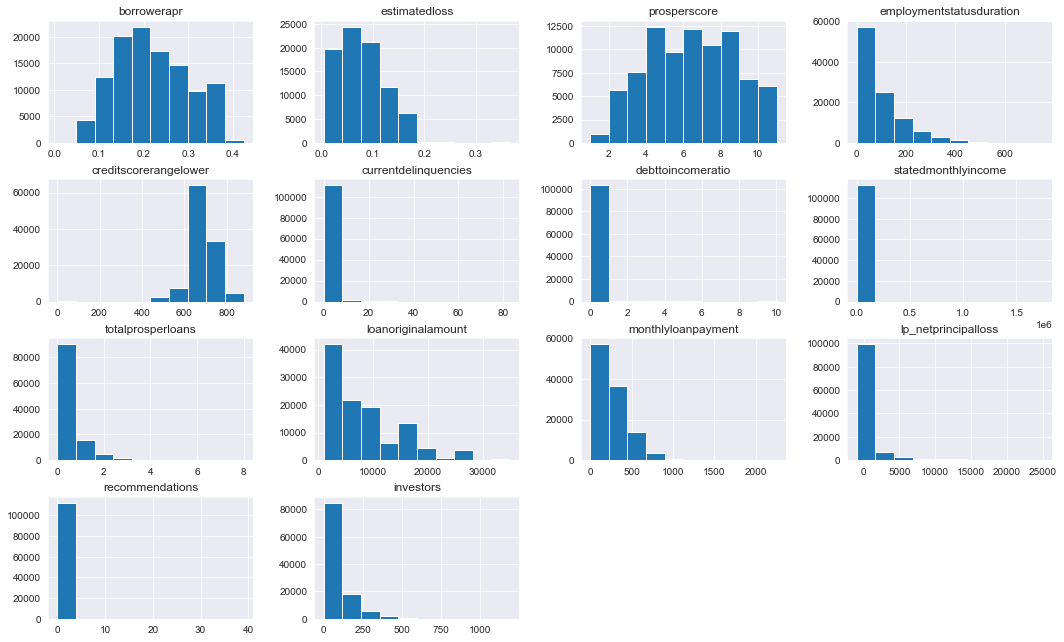

In [187]:
# plotting a histogram of the quantitative features of the dataset.
ploan.hist(figsize = [18, 11]);

#### 1. What is the distribution of borrowers annual percentage rate?

In [188]:
ploan.borrowerapr.describe()

count    112238.000000
mean          0.219218
std           0.080400
min           0.006530
25%           0.156290
50%           0.210250
75%           0.284820
max           0.423950
Name: borrowerapr, dtype: float64

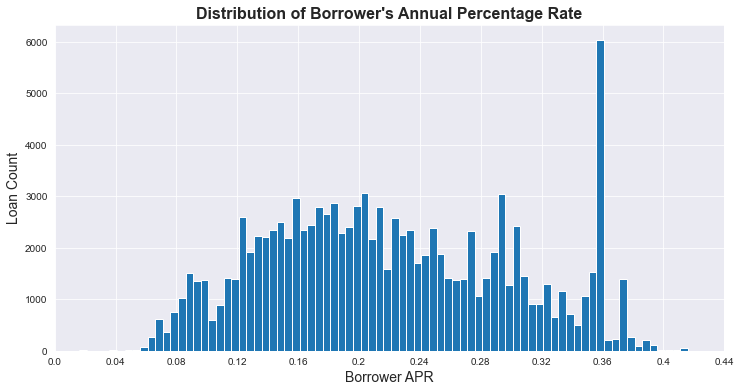

In [189]:
# plotting histogram for the 'borrowerapr' column
plt.figure(figsize = [12, 6])
bins = np.arange(0.006, 0.512290 + 0.03, 0.005)
ticks = np.arange(0, 0.45, 0.04)
plt.hist(x = ploan.borrowerapr, bins = bins)
plt.xlim(0.04, 0.44)
plt.xticks(ticks, ticks)

# creating function to set titles and labels
def titles(title, x_lab, y_lab):
    plt.title(title, fontweight = 'bold', fontsize = 16)
    plt.xlabel(x_lab, fontsize = 14)
    plt.ylabel(y_lab, fontsize = 14)
color = sb.color_palette()[0]

# calling function
titles("Distribution of Borrower's Annual Percentage Rate", 'Borrower APR', 'Loan Count')
plt.show;

The histogram shows the data spread being from around 0.06(6%) to 0.42(42%) of the amount borrowed.  
The number of loans that had a rate in between 0.35(35%)-0.36(36%) were the highest. This was followed by those of rate in between 0.19(19%)-0.20(20%) with 6000 loans approximately. The rates with the lowest number of loans were located at the ends of the distribution.

#### 2. What is the distribution of estimated losses from loans?

In [190]:
print('for linear scaling \n', ploan.estimatedloss.describe(), '\n')
print('for log scaling \n', np.log10(ploan.estimatedloss.describe()))

for linear scaling 
 count    83982.000000
mean         0.080417
std          0.046851
min          0.004900
25%          0.042400
50%          0.072400
75%          0.112000
max          0.366000
Name: estimatedloss, dtype: float64 

for log scaling 
 count    4.924186
mean    -1.094653
std     -1.329281
min     -2.309804
25%     -1.372634
50%     -1.140261
75%     -0.950782
max     -0.436519
Name: estimatedloss, dtype: float64


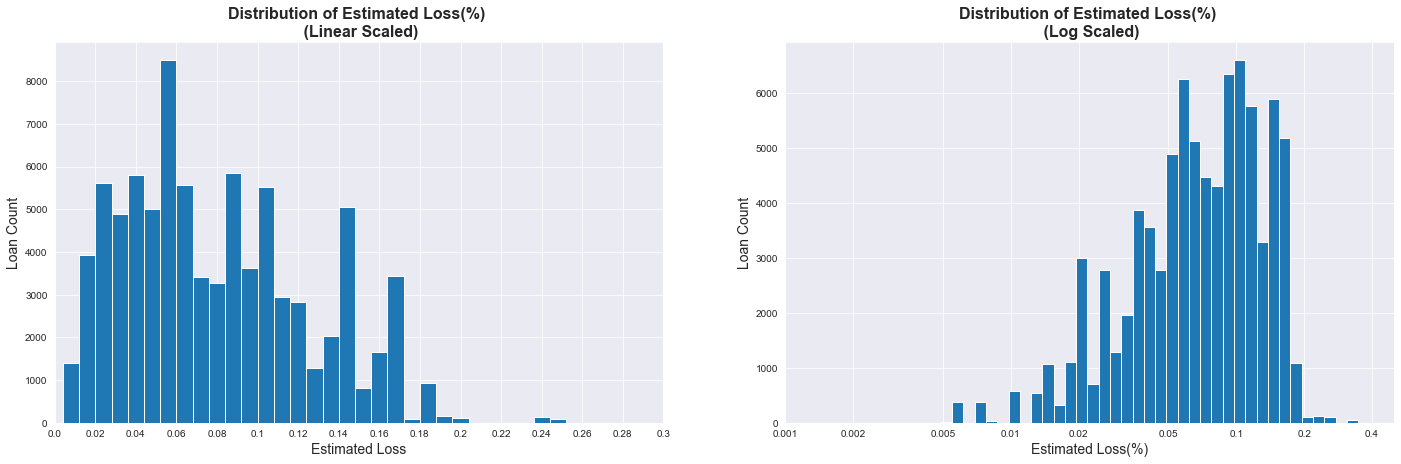

In [191]:
# plotting linear scaled histogram for 'estimatedloss' column
plt.figure(figsize = [24, 7])

plt.subplot(1, 2, 1)
bins = np.arange(0.004, 0.36 + 0.08, 0.008)
ticks = np.arange(0, 0.24 + 0.08, 0.02)
plt.hist(x = ploan.estimatedloss, bins = bins)
plt.xlim(0, 0.28)
plt.xticks(ticks, ticks)

# title and labels
titles("Distribution of Estimated Loss(%) \n (Linear Scaled)", 'Estimated Loss', 'Loan Count')
plt.show;

# plotting log scaled histogram for 'estimatedloss' column
plt.subplot(1, 2, 2)
bins = 10 ** np.arange(-2.309804,  -0.43 , 0.05)
ticks = [0.001, 0.002, 0.005, 0.010, 0.020, 0.050, 0.10, 0.2, 0.4]
plt.hist(x = ploan.estimatedloss, bins = bins)
plt.xscale('log')
plt.xlim(0.004, 0.5)
plt.xticks(ticks, ticks);

# title and labels
titles("Distribution of Estimated Loss(%) \n (Log Scaled)", 'Estimated Loss(%)', 'Loan Count')
plt.show;

On a linear scale: majority of the data seem to be on the low side, with the histogram being right skewed. The most common estimate for loans was around 6%.  

On a log scale: the distribution is multi-modal with the first peak around 6%. The numbers dropped then rose to reach a new higher peak at around 10%.

There are also noticeable estimates after 22% which are far away from the main data distribution.

#### 3. Did prosper actually make losses on loans?

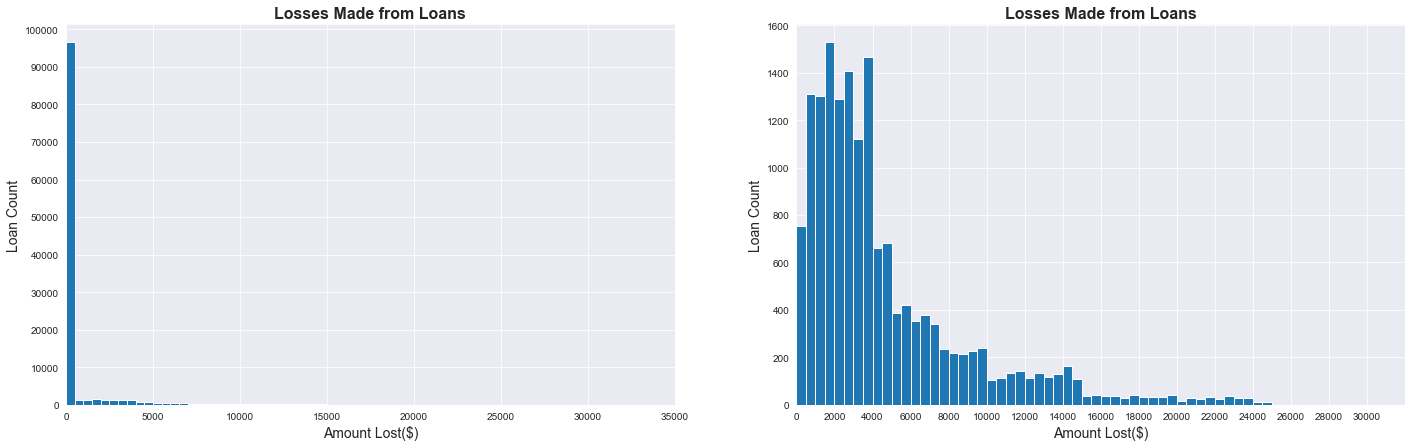

In [192]:
# plotting histogram for the 'lp_netprincipalloss' column
plt.figure(figsize = [24, 7])

plt.subplot(1, 2, 1)
bins = np.arange(0, 30000, 500)
ticks = np.arange(0, 110000, 10000)
plt.hist( x = ploan.lp_netprincipalloss, bins = bins)
plt.xlim(0, 35000)
plt.yticks(ticks, ticks)

# title and labels
titles("Losses Made from Loans", 'Amount Lost($)', 'Loan Count')
plt.show;

# plotting a log scaled histogram for the 'statedmonthlyincome' column
plt.subplot(1, 2, 2)
bins = np.arange(0.1, 30000, 500)
ticks = np.arange(0, 32000, 2000)
plt.hist( x = ploan.lp_netprincipalloss, bins = bins)
plt.xticks(ticks, ticks)
plt.xlim(0, 32000)

# title and labels
titles("Losses Made from Loans", 'Amount Lost($)', 'Loan Count')
plt.show;

From the first distribution, we can notice Prosper infrequently had occasions where they refunded investors or generaly spent more than the revenue generated from a loan.(could be due to default or charge off). They most times didn't make any loss on loans made through their platform.

From the second chart(which was done to better focus on the losses), we can notice a right-skewed distribution with the larger losses made less frequently. The most frequent net losses ranged around $\$$2k.

#### 4. What Prosperscore is the most popular among borrowers?

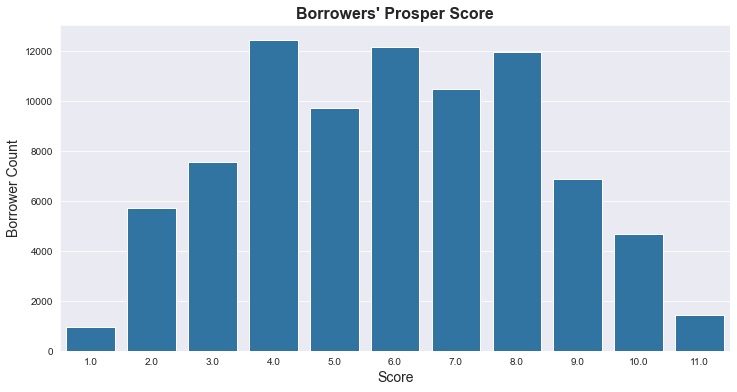

In [193]:
# plotting bar for 'prosperscore' column
base = sb.color_palette()[0]
plt.figure(figsize = [12, 6])
sb.countplot(x = ploan.prosperscore, color = base)

# title and labels
titles("Borrowers' Prosper Score", 'Score', 'Borrower Count')
plt.show;

Most borrowers fell within scores 2 to 10 with just little at the extremes of risk. The most popular prosper score was 4, closely followed by 6 and 8.


#### 5. Why did borrowers take the loans?

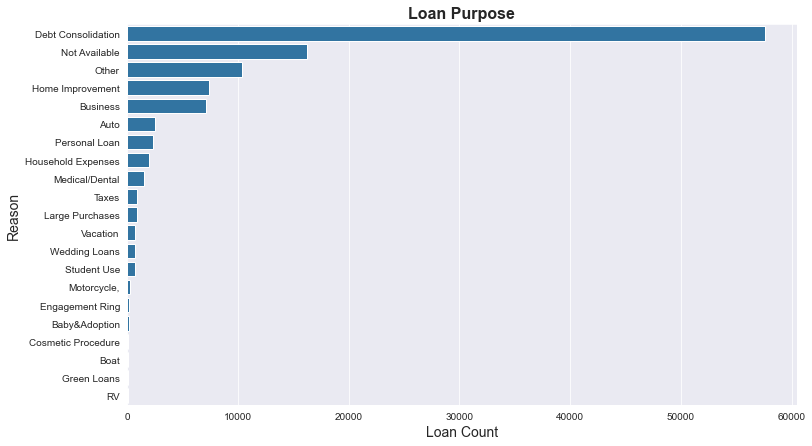

In [194]:
# plotting bars for 'listingcategory (numeric)' column
plt.figure(figsize = [12, 7])
reason = ploan['listingcategory (numeric)'].value_counts().index
sb.countplot(data = ploan, y = 'listingcategory (numeric)', order = reason, color = base)

# title and labels
titles("Loan Purpose", 'Loan Count', 'Reason')
plt.show;

Over half of loans all taken were for debt consolidation. This implies a lot of borrowers actually owed multiple lenders and wanted to streamline payments to just one lender.
Debt consolidation is followed by the desire to fund home improvement projects and repairs and then business reasons.
 

#### 6. What proportion of borrowers own homes?

,isborrowerhomeowner
True,56987
False,55251


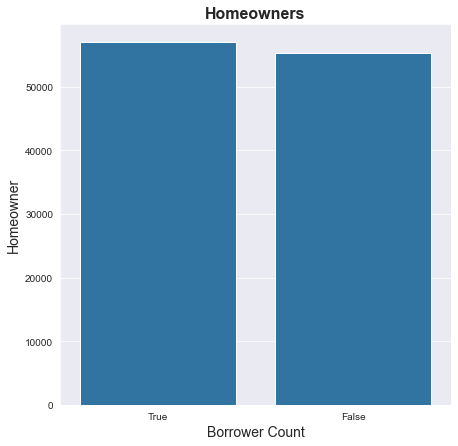

In [195]:
# plotting bars for 'isborrowerhomeowner' column
plt.figure(figsize = [7, 7])
sb.countplot(x = ploan.isborrowerhomeowner, order = ploan.isborrowerhomeowner.value_counts().index, color = base)

# title and labels
titles('Homeowners', 'Borrower Count', 'Homeowner')
plt.show;

pd.DataFrame(ploan.isborrowerhomeowner.value_counts())

The amount of homeowners just slightly edges the amount of borrowers without homes.

#### 7. What state has the highest amount of borrowers?

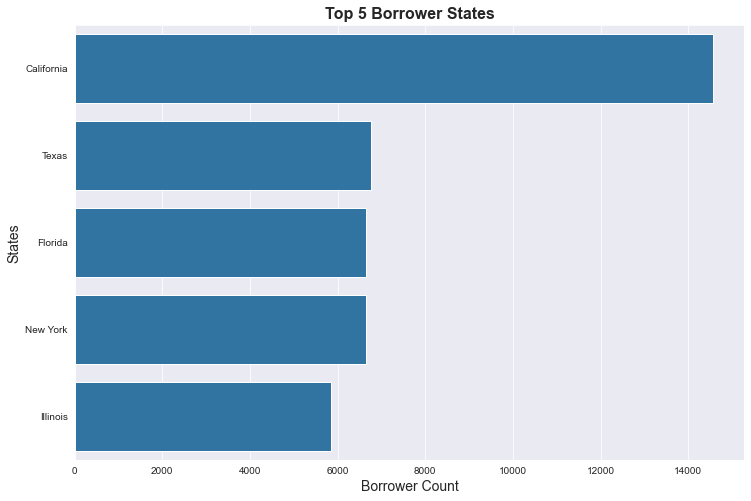

In [196]:
# plotting bars for 'borrowerstate' column
plt.figure(figsize = [12, 8])
s_order = ploan.borrowerstate.value_counts().nlargest(5).index
sb.countplot(y = ploan.borrowerstate, order = s_order, color = base)

# title and labels
titles('Top 5 Borrower States', 'Borrower Count', 'States')
plt.show;

The largest percentage of borrowers were from California. This was mainly determined by the population as it is the most populous state in the USA. The rest, Texas, Florida, New York and Illinois were also ranked in top 5 most populous states in the country. 

#### 8. Which loan term was popular among borrowers?

,term
12,1613
36,86397
60,24228


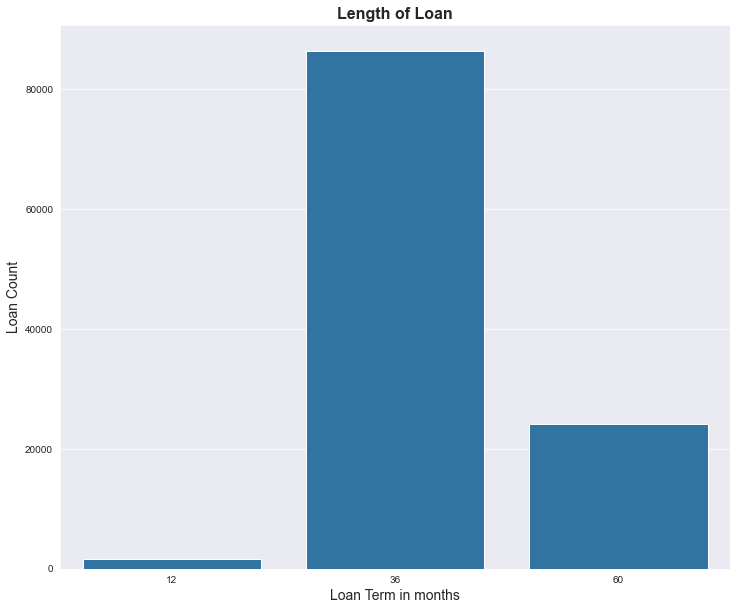

In [197]:
# plotting bars for 'term' column
plt.figure(figsize = [12, 10])
s_order = ploan.occupation.value_counts().nlargest(10).index
sb.countplot(x = ploan.term, color = base)

# title and labels
titles('Length of Loan', 'Loan Term in months', 'Loan Count')
plt.show;

pd.DataFrame(ploan.term.value_counts(sort = False))

Borrowers went more for 3-year loans with over 80k loans having that duration for repayment. 

#### 9. What proportion of borrowers were employed and by how long?

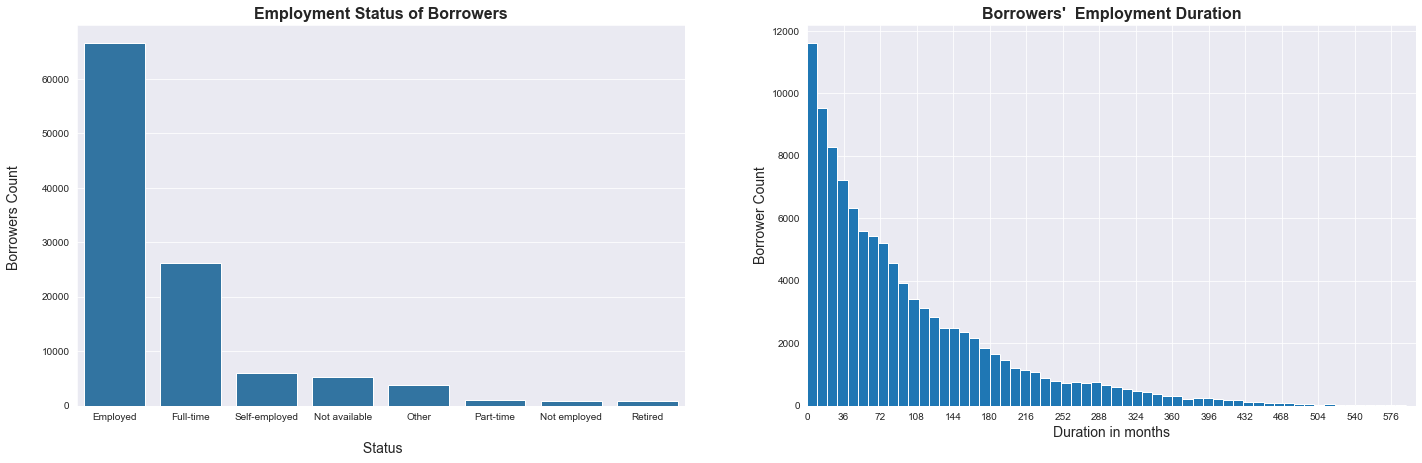

In [198]:
plt.figure(figsize = [24, 7])

# plotting bars for 'employmentstatus' column
plt.subplot(1, 2, 1)
s_order = ploan.employmentstatus.value_counts().index
sb.countplot(x = ploan.employmentstatus, order = s_order, color = base)

# title and labels
titles('Employment Status of Borrowers', '\n Status', 'Borrowers Count \n ')
plt.show;

# plotting histogram for the 'employmentstatusduration' column
plt.subplot(1, 2, 2)
bins = np.arange(0, 800, 10)
ticks = np.arange(0, 800, 36)
plt.hist(x = ploan.employmentstatusduration, bins = bins)
plt.xticks(ticks, ticks)
plt.xlim(0, 600)

# title and labels
titles("Borrowers'  Employment Duration", 'Duration in months', 'Borrower Count')
plt.show;

Over half of Prosper's customers had jobs with a large percentage of them being in their first year of employment when taking these loans.
The amount of loans taken by customers decreased with increasing years in jobs.

#### 10. In what credit range did most customers fall?

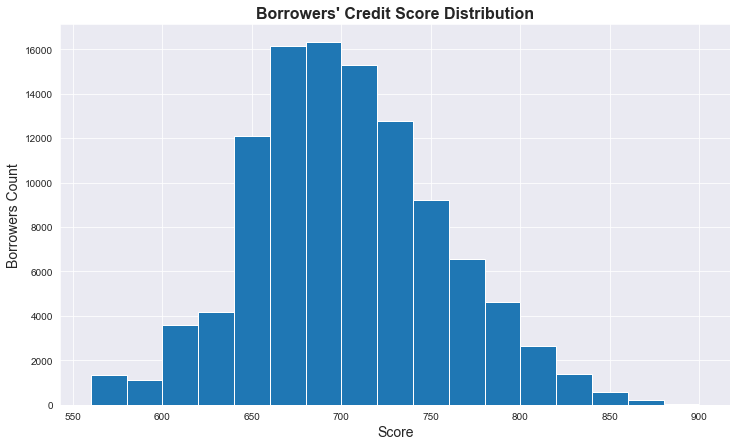

In [199]:
# plotting histogram for the 'creditscorerangelower' column
plt.figure(figsize = [12, 7])
bins = np.arange(560, 920, 20)
plt.hist(x = ploan.creditscorerangelower, bins = bins)

# title and labels
titles("Borrowers' Credit Score Distribution", 'Score', 'Borrowers Count')
plt.show;

According to some reviews, the minimum credit score to qualify for a prosper loan is 600. They seemed to have accepted just a few with a quite lower score down to 560. A bulk of their customers fell within 600 and 800, with just a few from there till 880. The distribution is unimodal with the largest credit score group being 680-700.

#### 11.  How much of Prosper's customers could verify their income? 

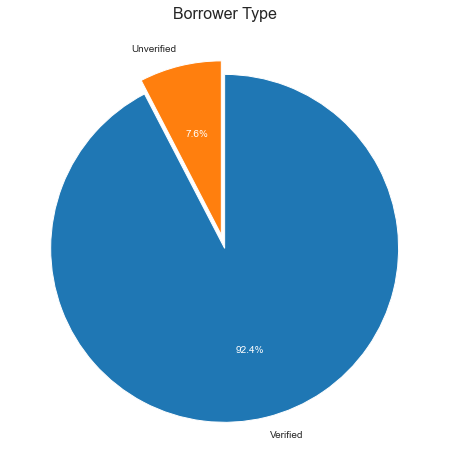

,incomeverifiable
True,103685
False,8553


In [200]:
# Percentage of verified and unverified customers
rcParams['figure.figsize'] = 10, 8

# plotting pie chart
_, _, autotexts = plt.pie(ploan.incomeverifiable.value_counts(), labels = ['Verified', 'Unverified'], 
                          startangle = 90, counterclock = False, 
        explode = (0, 0.08), radius = 1.0, autopct = '%1.1f%%')

# Change autopct text color to be white
for ins in autotexts:
    ins.set_color('white')
    
# title and labels
plt.title('Borrower Type', fontsize=16, y=1.015)
plt.rcParams['font.size'] = 14
plt.show();

pd.DataFrame(ploan.incomeverifiable.value_counts())

Most borrowers had their income verifiable as less than 10k borrowers could not authenticate their income source. 

#### 12. What is the distribution of income among Prosper customers?

In [201]:
ploan.statedmonthlyincome.describe()

count    1.122380e+05
mean     5.606659e+03
std      7.511120e+03
min      0.000000e+00
25%      3.206063e+03
50%      4.666667e+03
75%      6.828917e+03
max      1.750003e+06
Name: statedmonthlyincome, dtype: float64

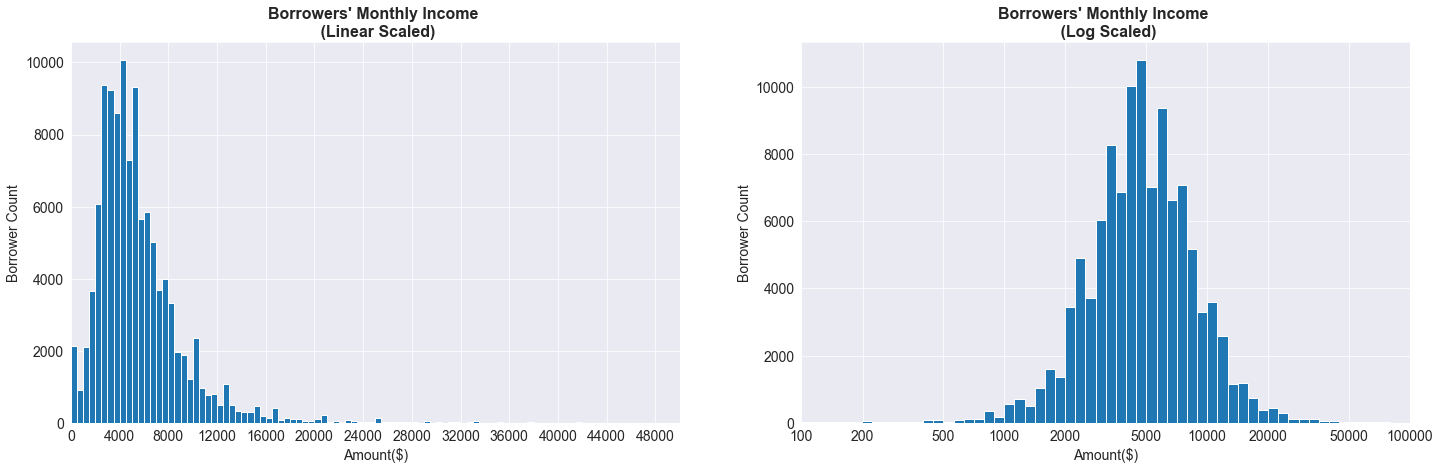

In [202]:
plt.figure(figsize = [24, 7])

# plotting histogram for the 'statedmonthlyincome' column
plt.subplot(1, 2, 1)
bins = np.arange(0, 1.750003e+06, 500)
ticks = np.arange(0, 50000, 4000)
plt.hist(x = ploan.statedmonthlyincome, bins =  bins)
plt.xlim(0, 5.0e+04)
plt.xticks(ticks, ticks)

# title and labels
titles("Borrowers' Monthly Income \n (Linear Scaled)", 'Amount($)', 'Borrower Count')
plt.show;

# plotting a log scaled histogram for the 'statedmonthlyincome' column
plt.subplot(1, 2, 2)
bins = 10 ** np.arange(0, 6.5, 0.05)
ticks = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
plt.hist(x = ploan.statedmonthlyincome, bins =  bins)
plt.xscale('log')
plt.xlim(200, 3.0e+04)
plt.xticks(ticks, ticks)

# title and labels
titles("Borrowers' Monthly Income \n (Log Scaled)", 'Amount($)', 'Borrower Count')
plt.show;

The distribution is right-skewed so a log scale was used on the x-axis to make it-log normal.

Monthly income varied from $\$$0 - $\$$175k(not reflected here as an outlier). A large part of borrowers earned between $\$$2k and $\$$10k per month with a little proportion of customers earning either side of that. The mean monthly income sat at approximately $\$$5,600.

#### 13. How many loans were taken by return customers?

,totalprosperloans
0.0,90375
1.0,15382
2.0,4495
3.0,1432
4.0,413
5.0,103
6.0,29
7.0,8
8.0,1


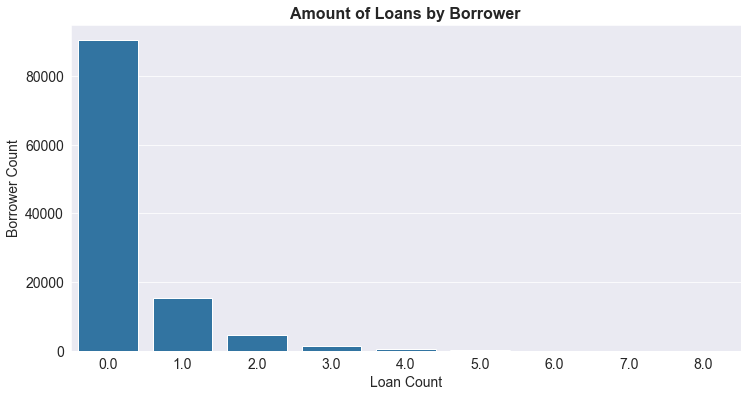

In [203]:
# plotting bars for 'totalprosperloans' column
plt.figure(figsize = [12, 6])
sb.countplot(x = ploan.totalprosperloans, color = base)

# title and labels
titles("Amount of Loans by Borrower", 'Loan Count', 'Borrower Count')
plt.show;

pd.DataFrame(ploan.totalprosperloans.value_counts())

Just a few were returning borrowers from Prosper, with about 90k people being first time customers.

#### 14. How much does an average person borrow?

In [204]:
ploan.loanoriginalamount.mean()

8342.16429373296

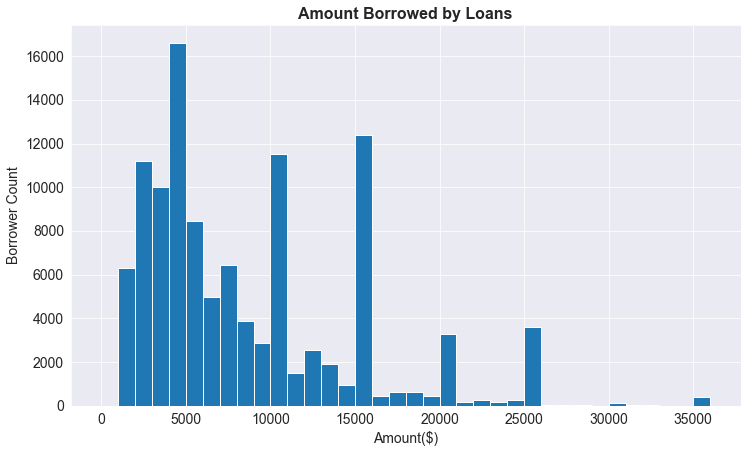

In [205]:
# plotting histogram for 'loanoriginalamount' column
plt.figure(figsize = [12, 7])
bins = np.arange(0, 36500, 1000)
plt.hist( x = ploan.loanoriginalamount, bins = bins)

# title and labels
titles("Amount Borrowed by Loans", 'Amount($)', 'Borrower Count')
plt.show;

Over the years, an average customer borrowed approximately $\$$8k.

Although a huge amount of people borrowed less than the mean, people borrowing above that range mostly did so in multiples of $\$$5k i.e. 10k, 15k, 20k and so on.

#### 15. What is the distribution of monthly payment?

In [206]:
np.log10(ploan.monthlyloanpayment.describe())

C:\Users\iyes\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.050140
mean     2.435795
std      2.284773
min          -inf
25%      2.120047
50%      2.338875
75%      2.570052
max      3.352474
Name: monthlyloanpayment, dtype: float64

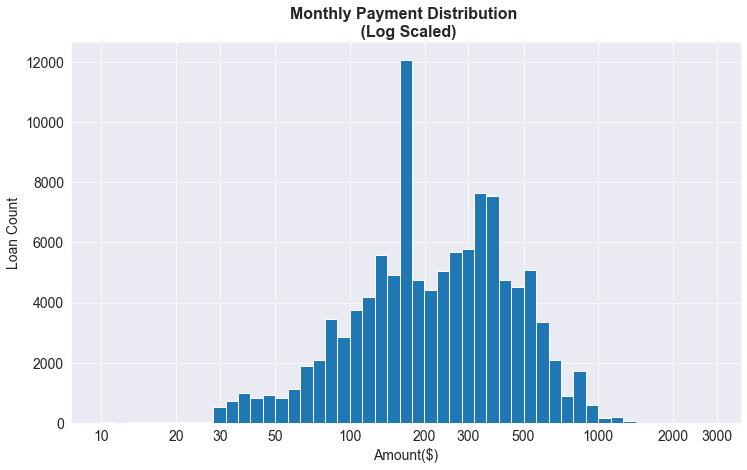

In [207]:
# plotting histogram for the 'monthlyloanpayment' column
plt.figure(figsize = [12, 7])
bins = 10 ** np.arange(1, 3.5, 0.05)
ticks = [10, 20, 30, 50, 100, 200, 300, 500, 1000, 2000, 3000]
plt.hist(x = ploan.monthlyloanpayment, bins = bins)
plt.xscale('log')
plt.xticks(ticks, ticks)

# title and labels
titles("Monthly Payment Distribution \n (Log Scaled)", 'Amount($)', 'Loan Count')
plt.show;

A huge number of people are paying just under the $200 mark per month.
This might be an amount favourable for borrowers to pay monthly resulting in loan terms(duration) being structured so repayments could be within this range.

#### 16. How many loans were taken over the years since inception?

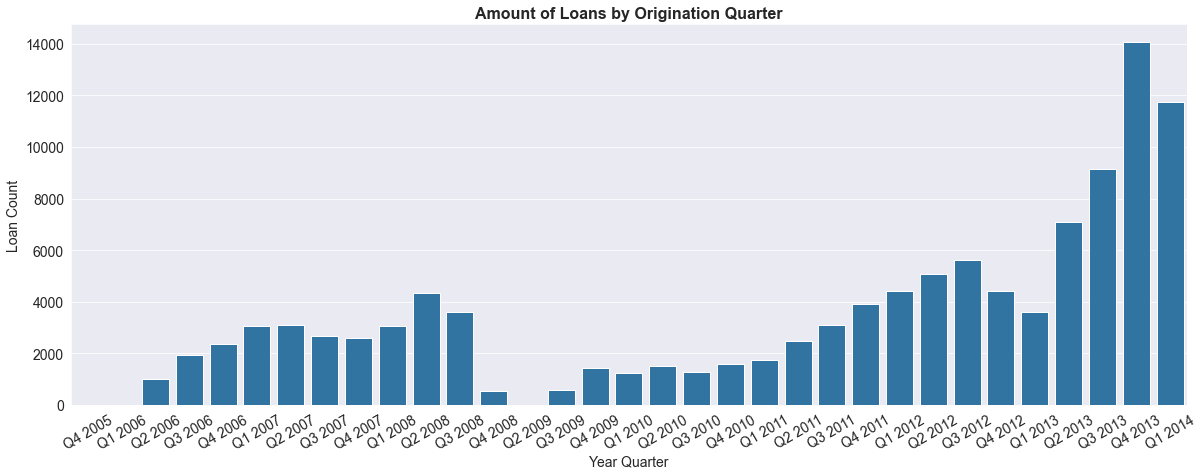

In [208]:
# plotting bars for loan origination quarter feature
plt.figure(figsize = [20, 7])
sb.countplot(x = ploan.loanoriginationquarter, color = base)
plt.xticks(rotation = 30)

# title and labels
titles('Amount of Loans by Origination Quarter', 'Year Quarter', 'Loan Count')
plt.show;

From its creation in 2005, prosper saw an increase in the amount of loans taken quartely up until 2009. The absence/presence(of minimal amount) of loans here could be attributed to their model change. The amount of loans taken started moving upward from the 2nd half of the year till 2013, where the company saw tremendous growth in loans taken on its platform. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The main variables of interest are `estimated loss`, `borrower APR` and `net principal loss`.

* From external reviews, prosper's lending APR is between 7.59% & 35.99% and this usually depends on credit worthiness and ability to repay loans.  
It could be noticed from the distribution of `borrowerapr` that a lot of loans taken actually got the 35.99% upper limit rate with just a few exceeding it up until 42%.  
* Estimated losses calculated for loans were generally spread from 0.4% to 20% with some going higher. A log transform was made to help with the slight linear distribution skew.
* Loans where losses were made were minute compared to those without losses. This is shown from the distribution of `lp_principalnetloss`.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There weren't really unexpected or unusual distributions among the supporting features except the fact that the major reason people borrowed from prosper was for debt consolidation.

> A situation where the same variable was stored in multiple columns(prosper rating and credit grade) was encountered and tidied. Also, the order of some categorical features were defined to aid visuals/visualization.

<a id = 'bi-eda'></a>

## Bivariate Exploration

In [209]:
cmatrix = ploan.corr() 

In [210]:
var = ['term', 'borrowerapr', 'estimatedloss', 'prosperscore', 
       'isborrowerhomeowner', 'creditscorerangelower', 'currentdelinquencies', 
       'debttoincomeratio', 'statedmonthlyincome', 
       'loanoriginalamount', 'monthlyloanpayment', 'lp_netprincipalloss',
       'investors']

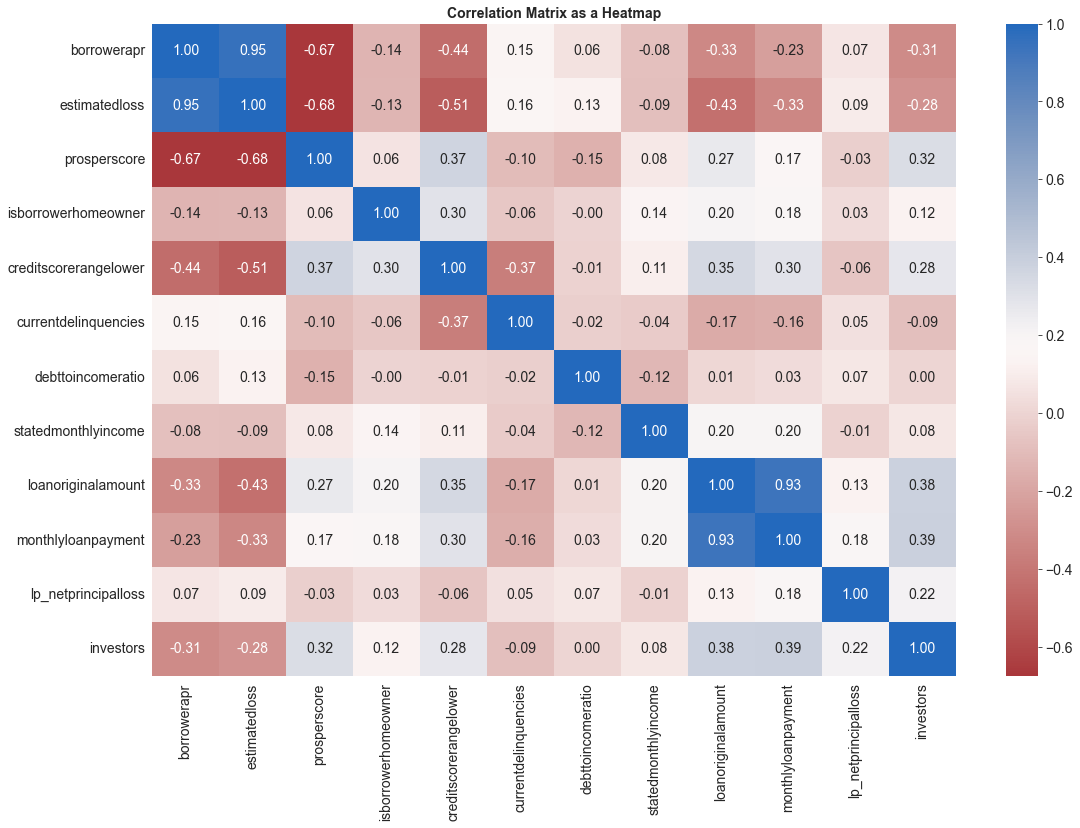

In [211]:
# plotting heatmap
plt.figure(figsize = [18, 12])
sb.heatmap(data = ploan[var].corr(), annot = True, cmap = 'vlag_r', fmt = '.2f')
plt.title('Correlation Matrix as a Heatmap', fontweight = 'bold', fontsize = 14)
plt.show();

Looking at our main variables of interest:  
> `estimatedloss` seems to have a strong positive correlation with `borrowerapr`; strong negative correlation with `prosperscore` & `creditscorerangelower`; moderate negative correlation with `loanoriginalamount` & `monthlyloanpayment`; and a weak linear correlation with `investors`.   

>`borrowerapr` follows the same trend as `estimatedloss`.  

> `lp_netprincipalloss` has a weak correlation with `investors`; and also seems to have no correlation with our other variable of interest `estimatedloss`.

> Others to note include:
> * the strong positive correlation between the loan amount and monthlypayment which is not unexpected.
> * the weak positive correlation loan amount has with creditscore & investors.
> * the weak negative correlation between current delinquencies and creditscore.

Some of these relationships will be further explored in this section.

### Main Variables
#### 1. Estimated Loss Relationships 

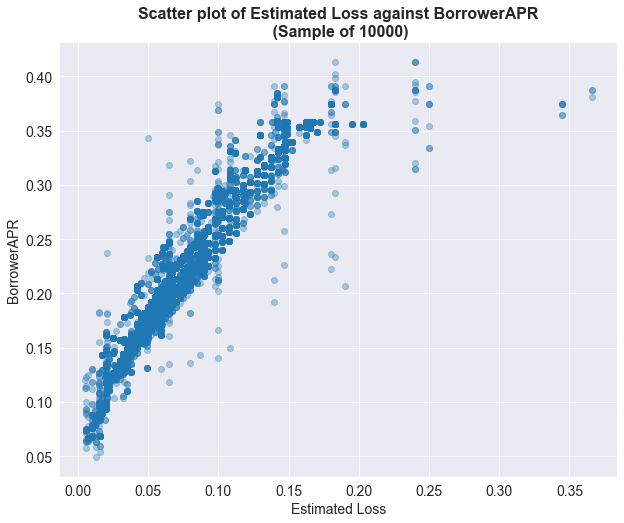

In [212]:
# creating samples
sample = ploan.sample(n = 10000)
sample2 = ploan.sample(n = 500)

# plotting scatterplot for 'estimated loss' & 'borrowerapr' columns
plt.figure(figsize = [10, 8])
sb.regplot(data = sample, x = 'estimatedloss', y = 'borrowerapr', fit_reg = False, scatter_kws = {'alpha' : 1/3})

# title and labels
titles("Scatter plot of Estimated Loss against BorrowerAPR\n (Sample of 10000)", 'Estimated Loss', 'BorrowerAPR')
plt.show;

The scatterplot shows a strong positive linear association betwen cost of borrowing per year and estimated principal loss on loans, with just a few potential outliers.
Lower costs and lower estimated loss could be associated with borrowers who have high prosper scores or credit rating. This would be explored in the next section.

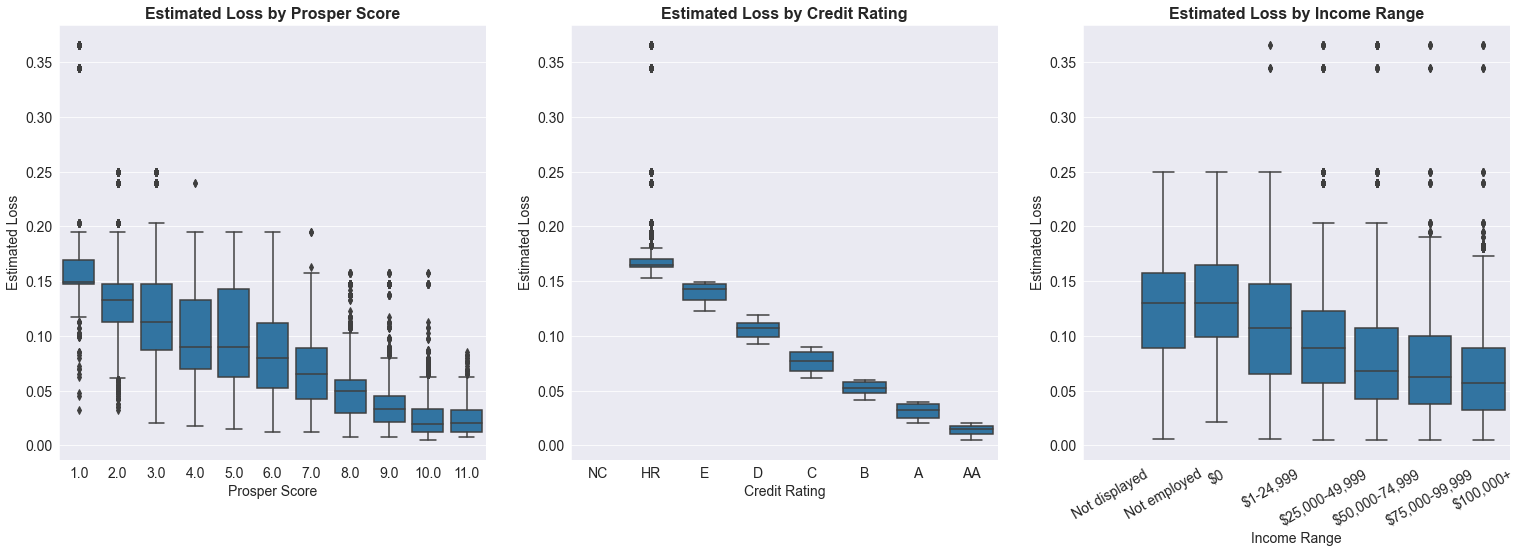

In [213]:
plt.figure(figsize = [26, 8])
#plotting box for prosper score
plt.subplot(1, 3, 1)
sb.boxplot(data = ploan, x = 'prosperscore', y = 'estimatedloss', color = base)
# title and labels
titles("Estimated Loss by Prosper Score", 'Prosper Score', 'Estimated Loss')
plt.show;

#plotting box credit rating
plt.subplot(1, 3, 2)
sb.boxplot(data = ploan, x = 'credit_rating', y = 'estimatedloss', color = base)
# title and labels
titles("Estimated Loss by Credit Rating", 'Credit Rating', 'Estimated Loss')
plt.show;

#plotting box
plt.subplot(1, 3, 3)
sb.boxplot(data = ploan, x = 'incomerange', y = 'estimatedloss', color = base)
plt.xticks(rotation = 30)
# title and labels
titles("Estimated Loss by Income Range", 'Income Range', 'Estimated Loss')
plt.show;

This paints a clear picture as it shows estimated losses decreasing with increasing prosper scores, increasing credit rating and also increasing income.

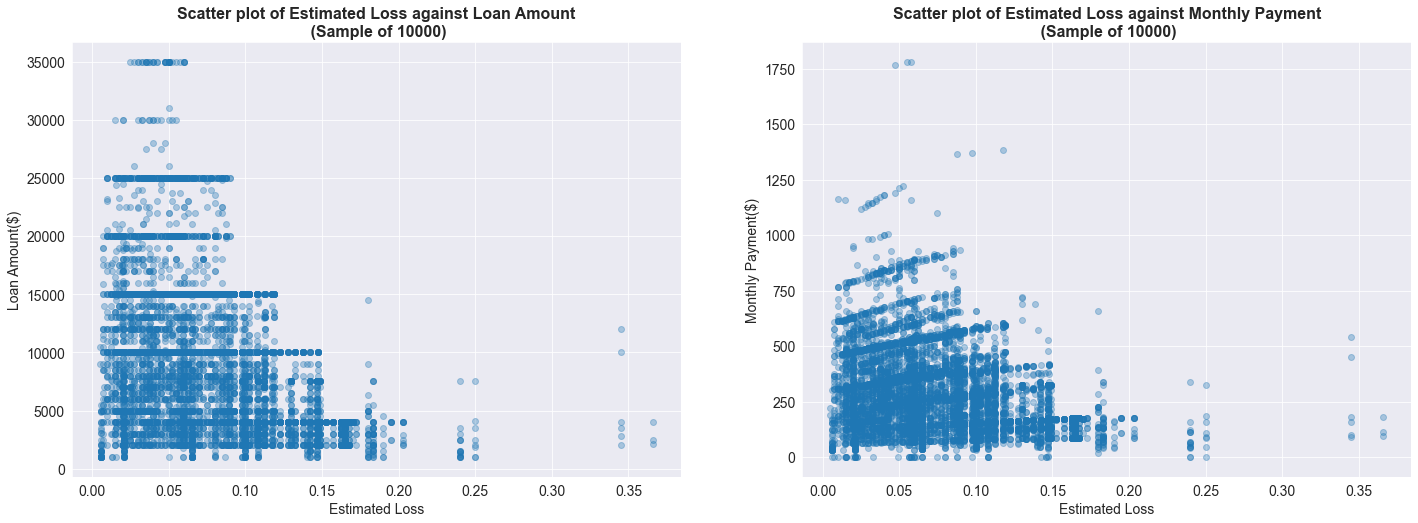

In [214]:
plt.figure(figsize = [24, 8])

plt.subplot(1, 2, 1)
# plotting scatterplot for 'estimated loss' & 'amount borrowed' columns
sb.regplot(data = sample, x = 'estimatedloss', y = 'loanoriginalamount', fit_reg = False, scatter_kws = {'alpha' : 1/3})

# title and labels
titles("Scatter plot of Estimated Loss against Loan Amount\n (Sample of 10000)", 'Estimated Loss', 'Loan Amount($)')
plt.show;

plt.subplot(1, 2, 2)
# plotting scatterplot for 'estimated loss' & 'monthly payment' columns
sb.regplot(data = sample, x = 'estimatedloss', y = 'monthlyloanpayment', fit_reg = False, scatter_kws = {'alpha' : 1/3})

# title and labels
titles("Scatter plot of Estimated Loss against Monthly Payment\n (Sample of 10000)", 'Estimated Loss', 'Monthly Payment($)')
plt.show;

There is a moderate negative linear association between the amount borrowed  and the estimated loss. 
The amount borrowed greatly determines the amount paid per month so it still also holds true for that.

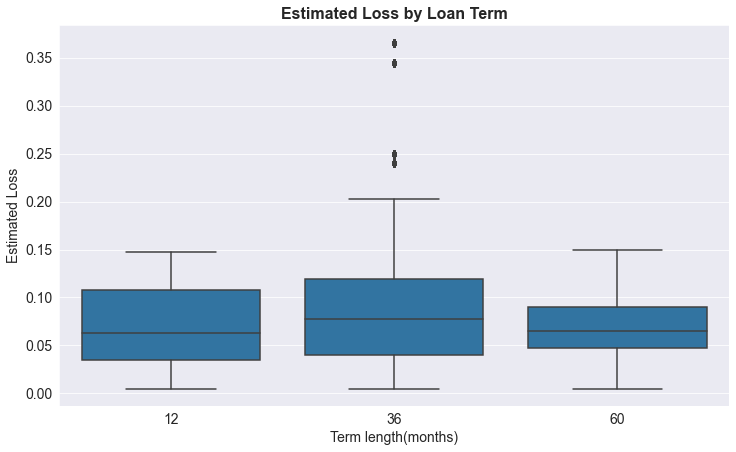

In [215]:
base = sb.color_palette()[0]

#plotting box
plt.figure(figsize = [12, 7])
sb.boxplot(data = ploan, x = 'term', y = 'estimatedloss', color = base)

# title and labels
titles("Estimated Loss by Loan Term", 'Term length(months)', 'Estimated Loss')
plt.show;

Midterm(3-year) loans seem to have the highest losses and highest range of losses associated with them. Outliers in losses were also present in loans in this category. This should be due to the fact that they were the most taken loans.

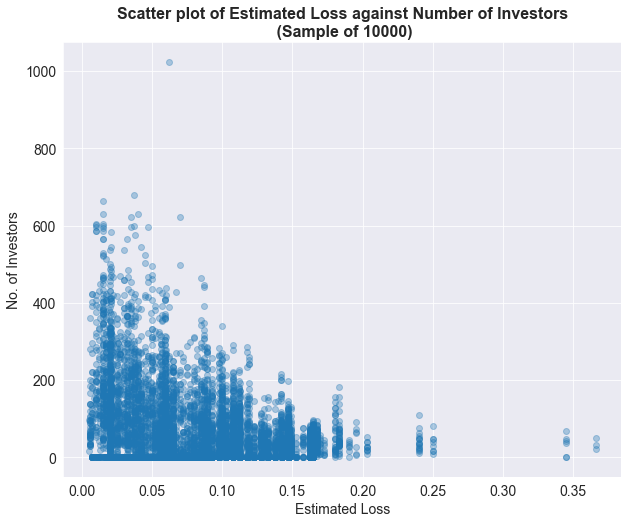

In [216]:
# plotting scatterplot for 'estimated loss' & 'investors' columns
plt.figure(figsize = [10, 8])
sb.regplot(data = sample, x = 'estimatedloss', y = 'investors', fit_reg = False, scatter_kws = {'alpha' : 1/3})

# title and labels
titles("Scatter plot of Estimated Loss against Number of Investors\n (Sample of 10000)", 'Estimated Loss', 'No. of Investors')
plt.show;

This shows a weak negative linear correlation between both variables. This is understandable as investors are more likely drawn to safer bets/loans.

#### 2. Net Loss Relationships


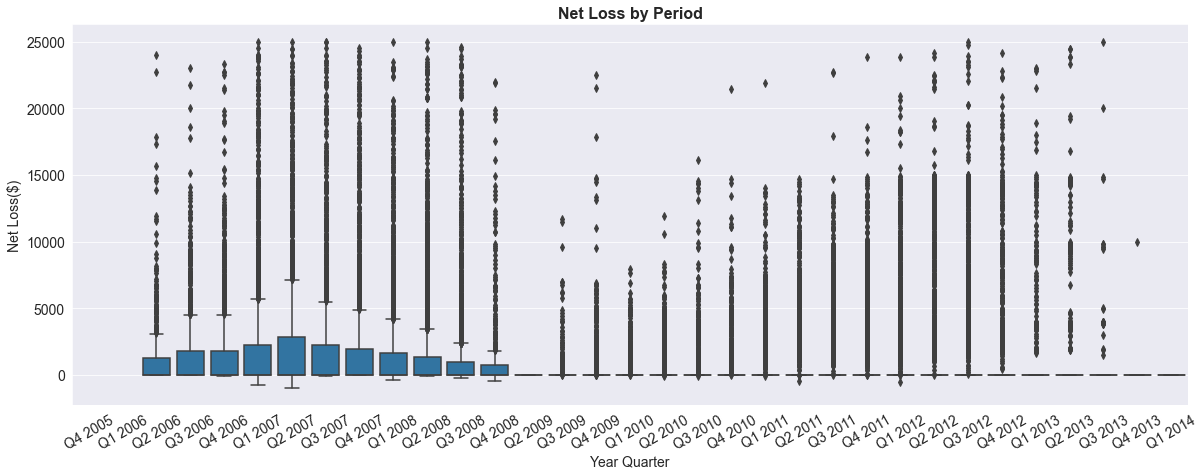

In [217]:
#plotting box for net loss over years
plt.figure(figsize = [20, 7])
sb.boxplot(data = ploan, x = 'loanoriginationquarter', y = 'lp_netprincipalloss', color = base)
plt.xticks(rotation = 30)

# title and labels
titles("Net Loss by Period", 'Year Quarter', 'Net Loss($)')
plt.show;

Before the change in approach, a lot of loans actually resulted in losses via defaults or charge offs. 
There were still losses post 2009, but they were very much less compared to the amount of loans completed in that period.

#### How exactly were the losses made?

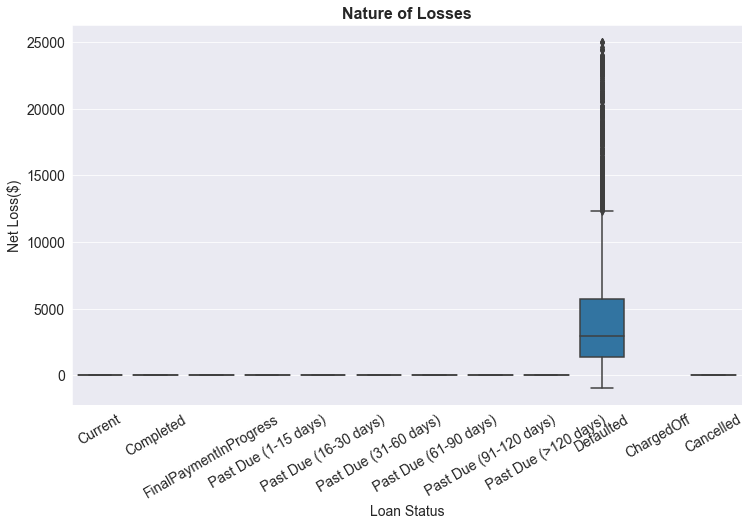

In [218]:
#plotting boxplot for net loss and loan status features
plt.figure(figsize = [12, 7])
sb.boxplot(data = ploan, x = 'loanstatus', y = 'lp_netprincipalloss', color = base)
plt.xticks(rotation = 30)

# title and labels
titles("Nature of Losses", 'Loan Status', 'Net Loss($)')
plt.show;

The losses made were on defaulted loans. Prosper probably refused to write it as charged off despite a sizeable chunk of these loans being defaulted before 2009

#### Which customers regularly defaulted?

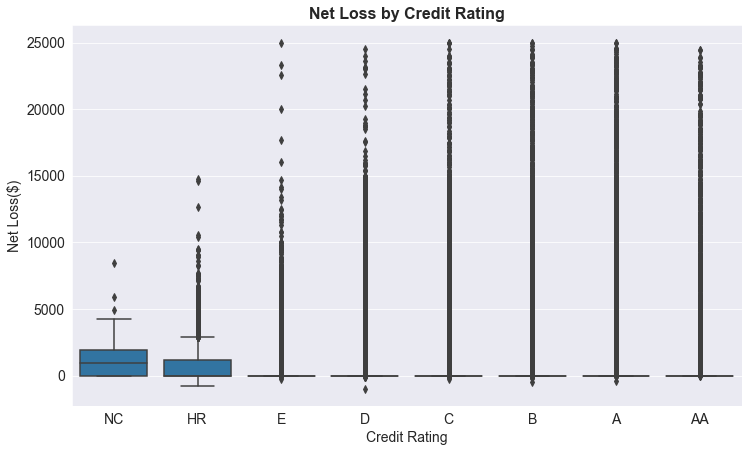

In [219]:
#plotting boxplot for net loss and credit rating features
plt.figure(figsize = [12, 7])
sb.boxplot(data = ploan, x = 'credit_rating', y = 'lp_netprincipalloss', color = base)

# title and labels
titles("Net Loss by Credit Rating", 'Credit Rating', 'Net Loss($)')
plt.show;

A larger part of the loans made by borrowers of ratings HR(High Risk) and NC were counted as losses. This would be due to charge offs or defaults. The losses incurred from customers with these ratings tend to be smaller(< $\$$15k) when compared to others(up to $\$$25k). This would probably be because the amount available to them to loan is less due to the risk involved).  
A huge chunk of other grades had no losses with just few outliers. When applicable though, some of these losses ran into high levels.

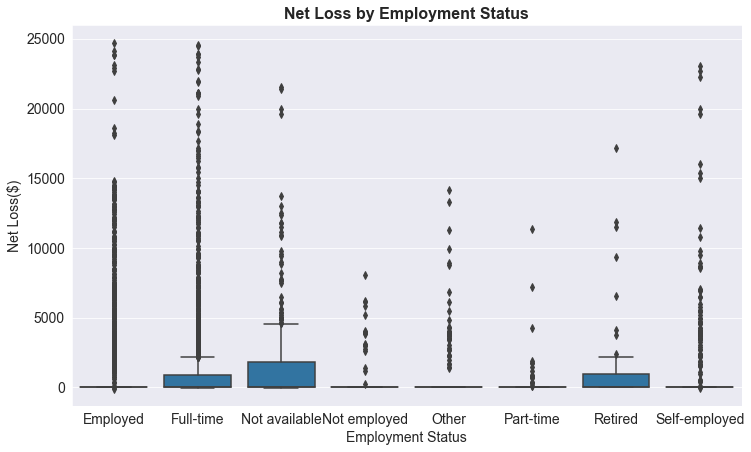

In [220]:
#plotting boxplot for net loss and employment status features
plt.figure(figsize = [12, 7])
sb.boxplot(data = sample, x = 'employmentstatus', y = 'lp_netprincipalloss', color = base)

# title and labels
titles("Net Loss by Employment Status", 'Employment Status', 'Net Loss($)')
plt.show;

Borrowers who are retired, unemployed, didn't state their employment status or full-time workers when taking loans are more likely to default on loans while borrowers who were generally employed, self employed and especially those who worked multiple jobs(part-time) are widely compliant.

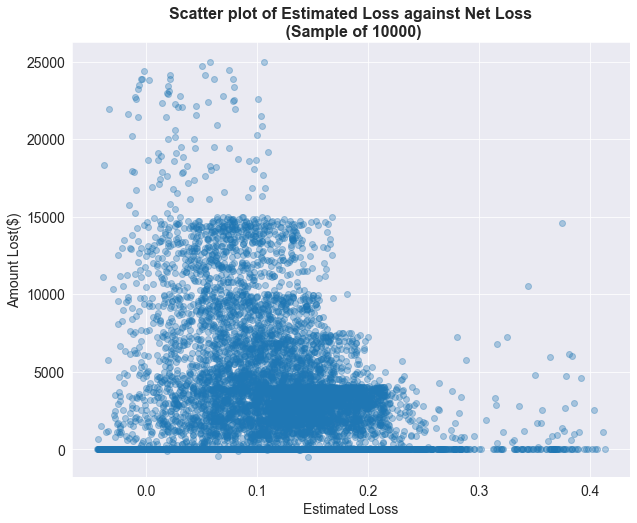

In [221]:
# plotting scatterplot for 'estimated loss' & 'investors' columns
plt.figure(figsize = [10, 8])
sb.regplot(data = ploan, x = 'estimatedloss', y = 'lp_netprincipalloss', fit_reg = False, scatter_kws = {'alpha' : 1/3}, x_jitter = 0.05)

# title and labels
titles("Scatter plot of Estimated Loss against Net Loss\n (Sample of 10000)", 'Estimated Loss', 'Amount Lost($)')
plt.show;

Higher amounts lost are mostly related to lower estimates with loans having high estimated losses bringing in losses less than $\$$15k.

### Other variables
#### In what credit rating category can delinquents be found mostly?

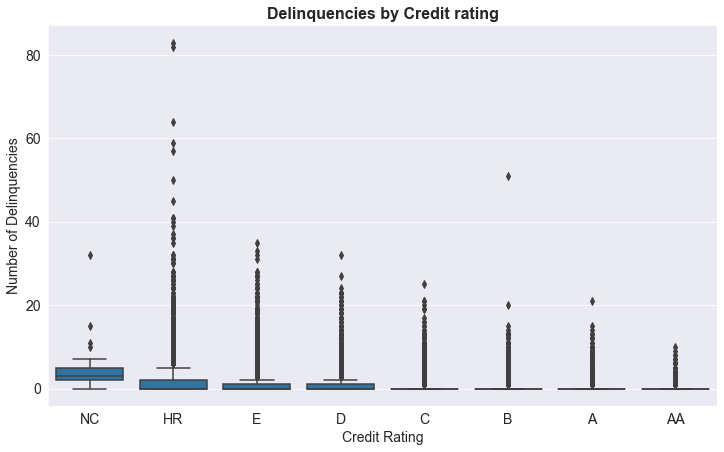

In [222]:
#plotting boxplot for 'credit rating' and 'currentdelinquencies' columns
plt.figure(figsize = [12, 7])
sb.boxplot(data = ploan, x = 'credit_rating', y = 'currentdelinquencies', color = base)

# title and labels
titles("Delinquencies by Credit rating", 'Credit Rating', 'Number of Delinquencies')
plt.show;

Delinquents were mostly found in the NC and HR credit rating category with their numbers gradually decreasing with increasing rating.

#### Are loan terms indicators of borrowed amounts?

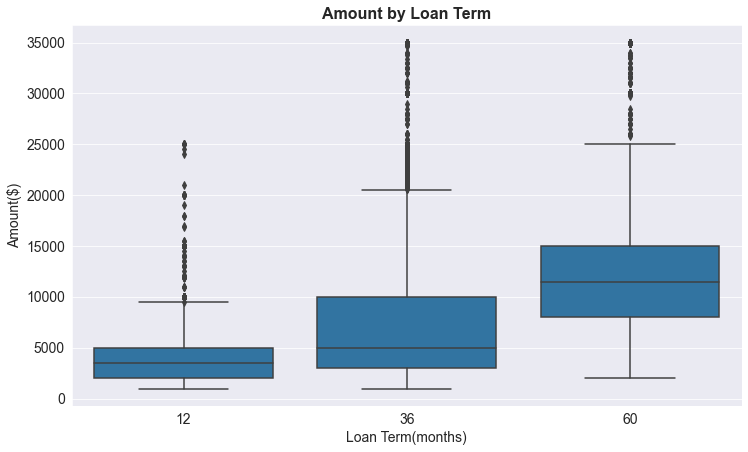

In [223]:
#plotting boxplot for 'term' and 'loanoriginalamount' columns
plt.figure(figsize = [12, 7])
sb.boxplot(data = ploan, x = 'term', y = 'loanoriginalamount', color = base)

# title and labels
titles("Amount by Loan Term", 'Loan Term(months)', 'Amount($)')
plt.show;

This holds true as lower amounts are associated with the short term loans and the higher loan amounts associated with long term loans.

#### Do high income earners have low debt-to-income ratio?

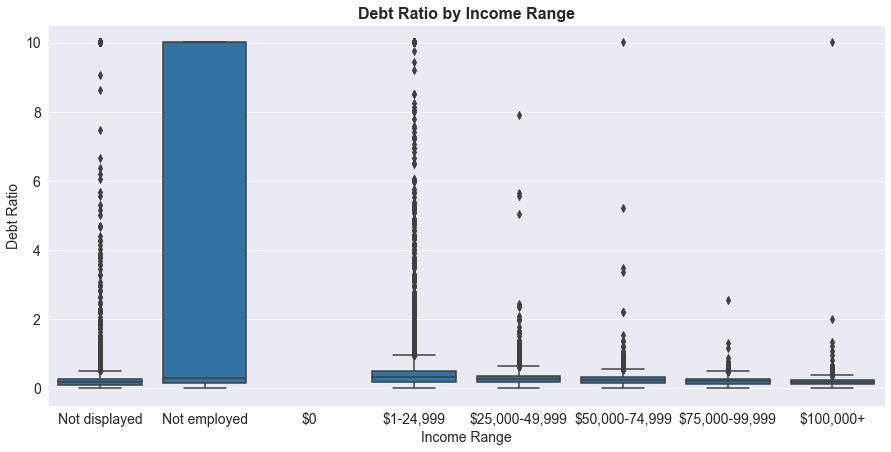

In [224]:
#plotting boxplot for income range and debt ratio features
plt.figure(figsize = [15, 7])
sb.boxplot(data = ploan, x = 'incomerange', y = 'debttoincomeratio', color = base)

# title and labels
titles("Debt Ratio by Income Range", 'Income Range', 'Debt Ratio')
plt.show;

This also holds true. For most borrowers, their debt ratio was less than 1 which is good. The ratio generally decreased as the income range increased, with the exception of the unemployed who had really high debt-to-income ratios. This is expected as they they do not have a defined source of income.

#### Do high income earners attract more investors?

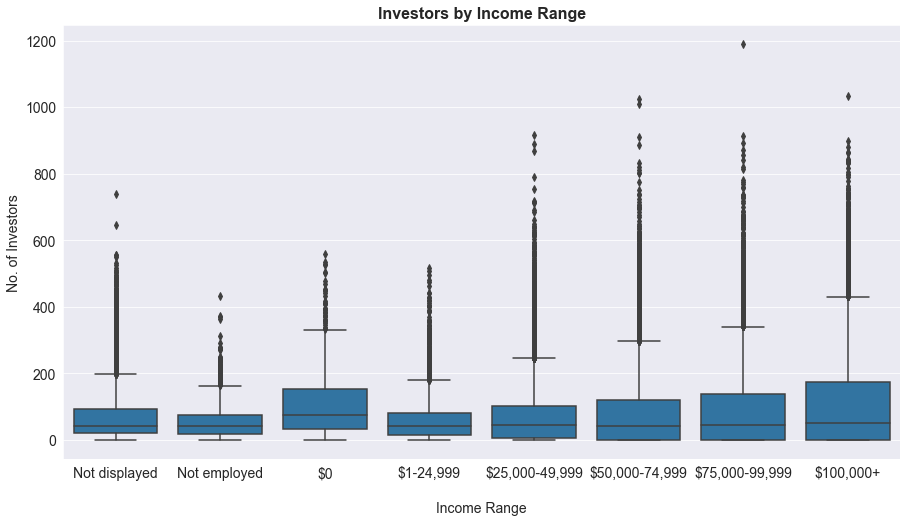

In [225]:
#plotting boxplot for 'income range' and 'investors' columns
plt.figure(figsize = [15, 8])
sb.boxplot(data = ploan, x = 'incomerange', y = 'investors', color = base)

# title and labels
titles("Investors by Income Range", '\nIncome Range', 'No. of Investors')
plt.show;

For those employed and actually earning, the number of investors who funded loans increased with increasing income. The number of investors were unusually high for those employed but were earning nothing($0). 

#### Are investors attracted to borrowerswith low debt-to-income ratios?

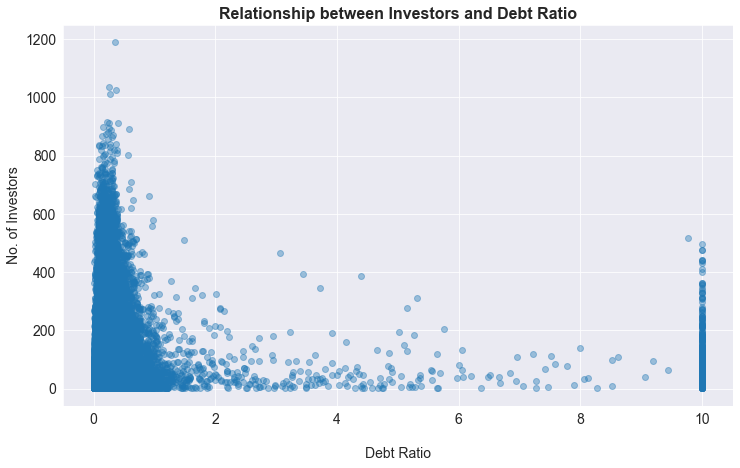

In [226]:
# plotting scatterplot for 'debttoincomeratio' and 'investors' columns
plt.figure(figsize = [12, 7])
sb.regplot(data = ploan, x = 'debttoincomeratio', y = 'investors', scatter_kws = {'alpha' : 0.4}, fit_reg = False)

# title and labels
titles("Relationship between Investors and Debt Ratio", '\nDebt Ratio', 'No. of Investors')
plt.show;

From the scatterplot, it is evident that investors were attracted to borrowers with lower debt-to-income ratio with their numbers decreasing as the ratio increased. People with a debt ratio of 10 were not affected by this trend though as they had investors from all range.

#### Do recommendations really help attract investors?

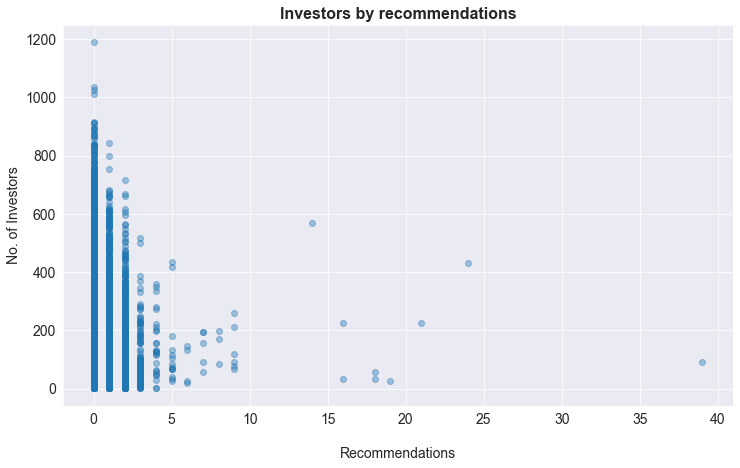

In [227]:
# plotting scatterplot for 'recommendatioms' and 'investors' columns
plt.figure(figsize = [12, 7])
sb.regplot(data = ploan, x = 'recommendations', y = 'investors', scatter_kws = {'alpha' : 0.4}, fit_reg = False)

# title and labels
titles("Investors by recommendations", '\nRecommendations', 'No. of Investors')
plt.show;

The chart above shows otherwise as people with no recommendations were able to get investors from all ends  

#### How much has been borrowed from prosper over the years?

In [228]:
line = ploan.groupby('loanoriginationquarter')['loanoriginalamount'].sum()

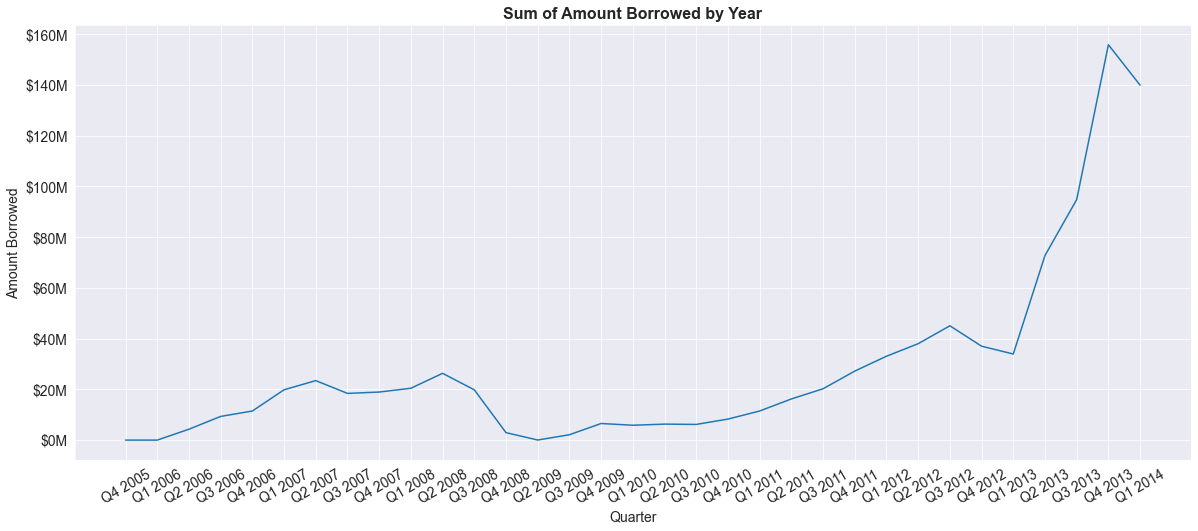

In [229]:
# plotting lineplot for 'loanoriginalamount' and 'loanoriginationquarter' features
plt.figure(figsize = [20, 8])
ticks = np.arange(0, 161000000, 20000000)
labels = ['$0M', '$20M', '$40M', '$60M', '$80M', '$100M', '$120M', '$140M', '$160M']
plt.plot(line)
plt.xticks(rotation = 30)
plt.yticks(ticks, labels)

# title and labels
titles('Sum of Amount Borrowed by Year', 'Quarter', 'Amount Borrowed')
plt.show;

From inception in late 2005, the amount borrowed from these peer funded loans grew from $\$$76k to a peak of about $\$$26M in 2008.  
The decline after coincided with propser changing their business model from lenders determining loan rates to preset rates determined by the company. After this the amount grew steadily up until 2012 where it stalled for a bit before which an exponential rate of groth was then experienced from 2013 to early 2014 making a new peak of about $\$$156M.

#### Average Loan APR per year?

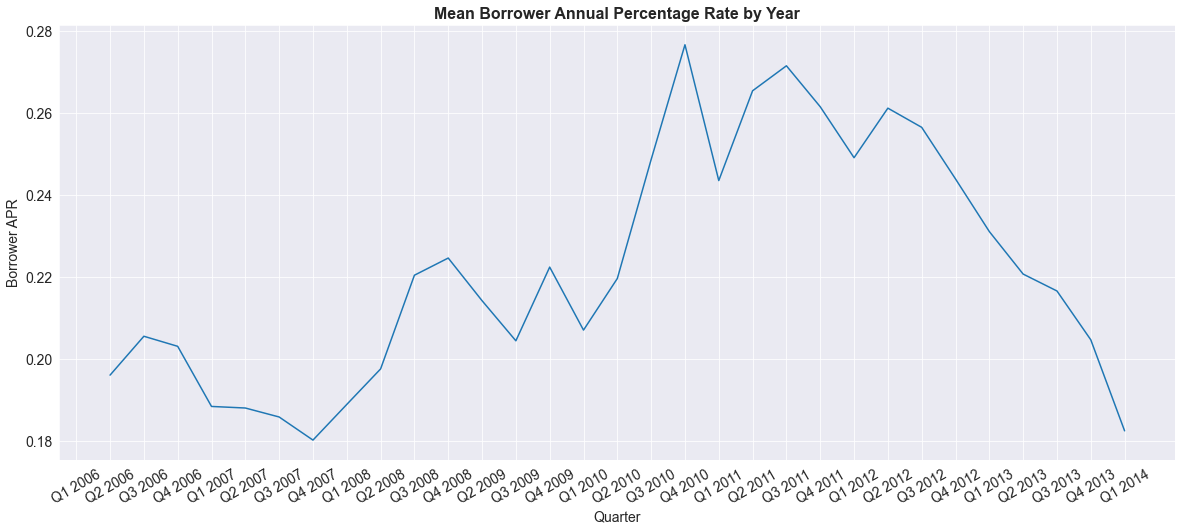

In [230]:
apr = ploan.groupby('loanoriginationquarter')['borrowerapr'].mean()

# plotting line for borrowerAPR
plt.figure(figsize = [20, 8])
plt.plot(apr)
plt.xticks(rotation = 30)

# title and labels
titles('Mean Borrower Annual Percentage Rate by Year', 'Quarter', 'Borrower APR')
plt.show;

The mean APR for loans reached a peak a year after 2009 and drastic reduction in the charge can be seen from 2012 to 2014. This might mean propser  gradually tried to secure loans by lending to high credit/income individuals. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* `Estimated Loss` has a strong positive correlation with `borrowerAPR`, strong negative correlation with `prosper score`, `credit rating` and `income range`. It also has a moderate negative linear association with the amount borrowed and a weak negative one with the number of investors funding a loan. 

* Losses are mainly made via defaults from high risk(HR) and NC(no credit?) individuals who were either unemployed, retired, full-time. These losses were very common amongst loans taken before 2009.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* Delinquents are mostly found at the lower levels of credit rating.
* Loan lifetime(duration) is a huge indicator of the amount borrowed.
* High-income earners had low debt-to-income ratios and were able to attract more investors for funding.
* The number of recommendations did not really matter to investors.
* The amount of money borrowed from Prosper's marktplace grew from $\$$76K to a peak of $\$$160M in the last quarter of 2013.


<a id = 'multi-eda'></a>
## Multivariate Exploration


C:\Users\iyes\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


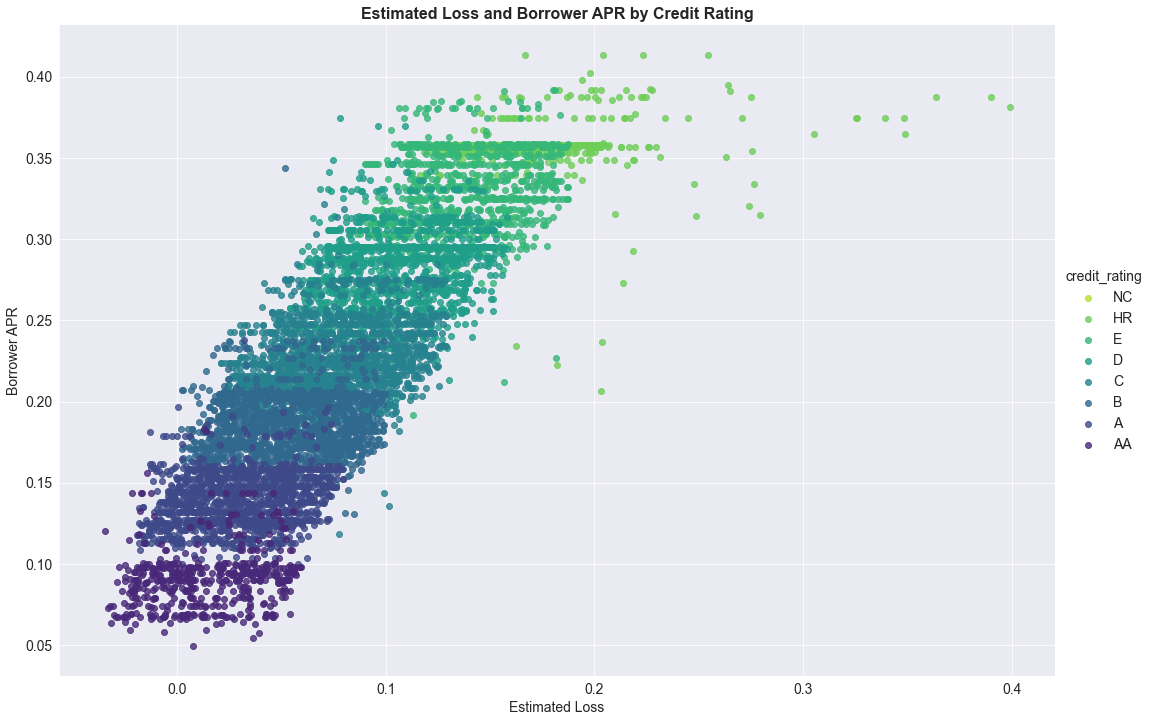

In [231]:
# plotting multivariate scatterplot
g = sb.FacetGrid(data = sample, hue = 'credit_rating', size = 10,  aspect = 1.5, palette = 'viridis_r')
g = g.map(sb.regplot, 'estimatedloss', 'borrowerapr', fit_reg = False, x_jitter = 0.04)

# title and labels
g.add_legend()
# title and labels
titles('Estimated Loss and Borrower APR by Credit Rating', 'Estimated Loss', 'Borrower APR')
plt.show;

As earlier stated, there's a strong positive linear correlation between estimated loss and borrower APR. Also, as earlier speculated, lower estimated loss and borrower APR are associated with higher credit rating while lower credit ratings get higher loss estimates and higher annual percentage rates.

C:\Users\iyes\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


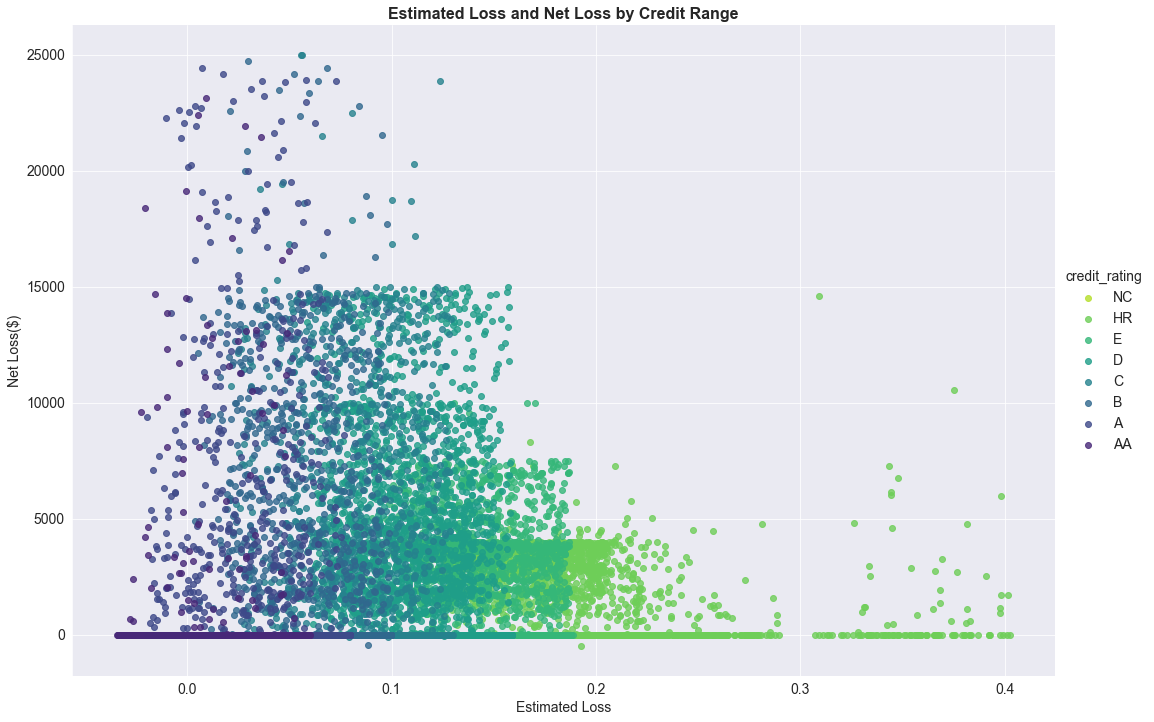

In [232]:
# Plotting multivariate scatterplot
g = sb.FacetGrid(data = ploan, hue = 'credit_rating', size = 10,  aspect = 1.5, palette = 'viridis_r')
g = g.map(sb.regplot, 'estimatedloss', 'lp_netprincipalloss', fit_reg = False, x_jitter = 0.04)

# title and labels
g.add_legend()
# title and labels
titles('Estimated Loss and Net Loss by Credit Range', 'Estimated Loss', 'Net Loss($)')
plt.show;

There is a seemingly negative correlation between losses made and estimated loss. Interesting to note is that people with high credit rating and low estimated loss account for loans with the highest amount lost(reaching up to $\$$25k). This trends down to low credit ratings accounting for lesser amounts lost.

C:\Users\iyes\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


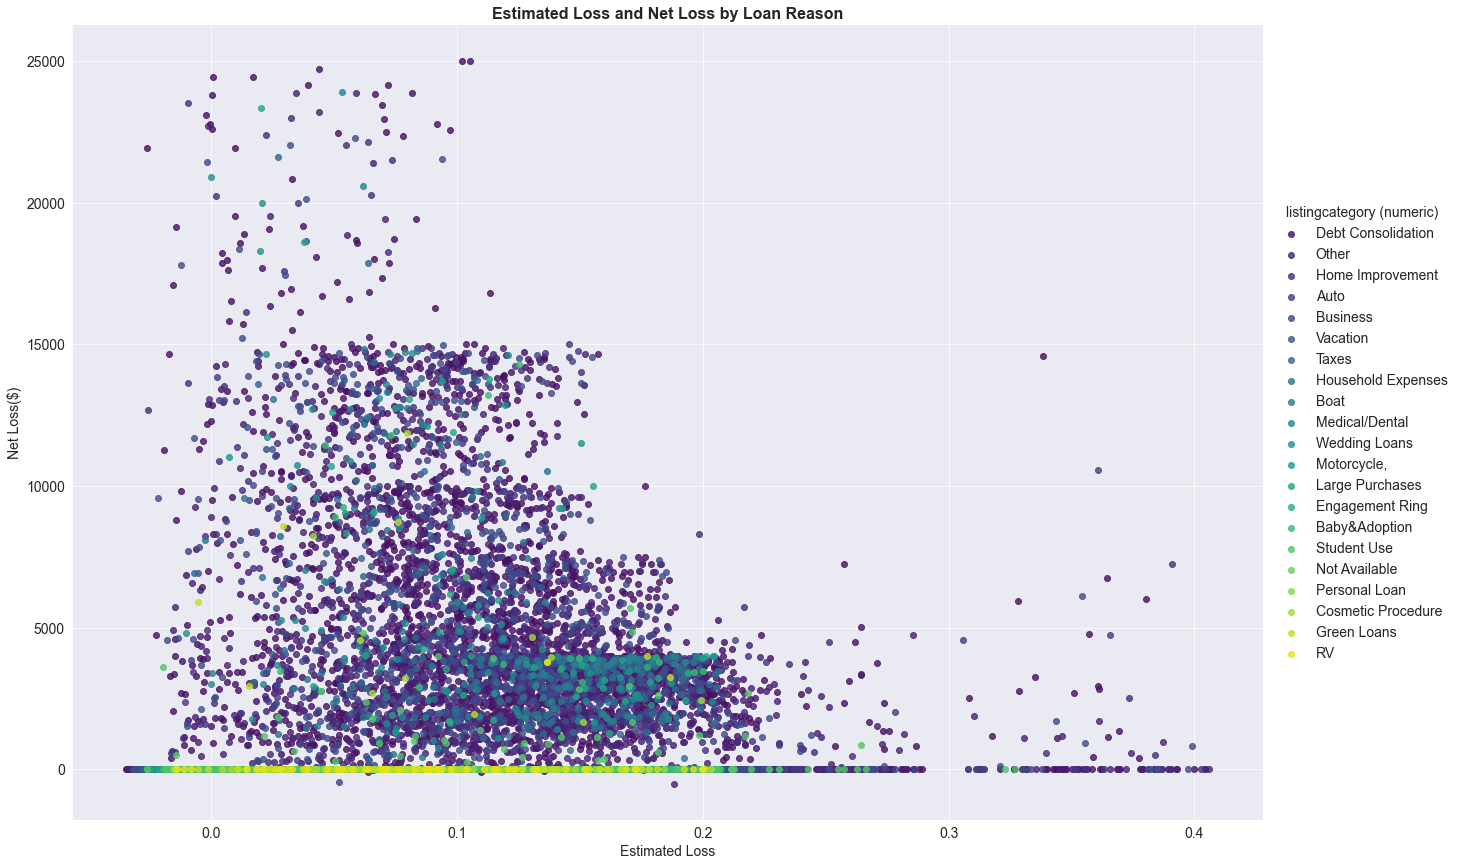

In [233]:
# plotting multivariate scatterplot
g = sb.FacetGrid(data = ploan, hue = 'listingcategory (numeric)', size = 12,  aspect = 1.5, palette = 'viridis')
g = g.map(sb.regplot, 'estimatedloss', 'lp_netprincipalloss', fit_reg = False, x_jitter = 0.04)

# title and labels
g.add_legend()
titles('Estimated Loss and Net Loss by Loan Reason', 'Estimated Loss', 'Net Loss($)')
plt.show;

Debt enforced borrowing seems to be a big culprit as to why borrowers default and losses are incurred. Conversely, RV loans, green loans and those meant for cosmetic loans didn't result in losses.

C:\Users\iyes\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


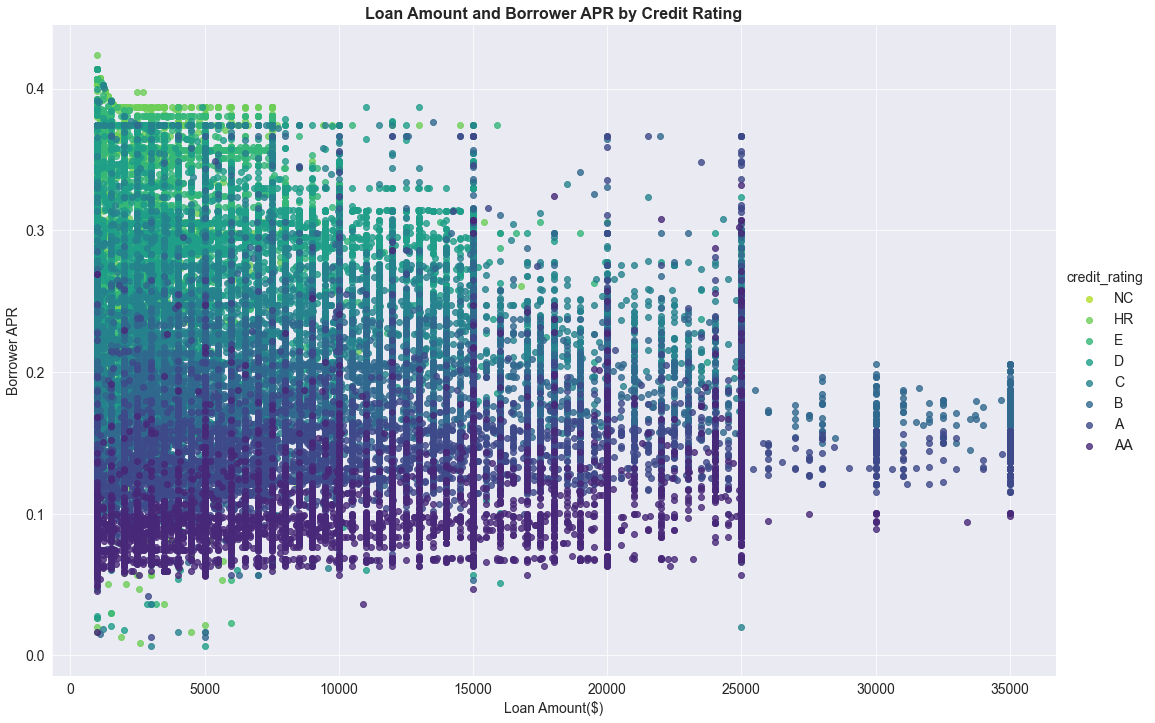

In [234]:
# plotting multivariate scatterplot
g = sb.FacetGrid(data = ploan, hue = 'credit_rating', size = 10,  aspect = 1.5, palette = 'viridis_r')
g = g.map(sb.regplot, 'loanoriginalamount', 'borrowerapr', fit_reg = False, x_jitter = 0.04)

# title and labels
g.add_legend()
titles('Loan Amount and Borrower APR by Credit Rating', 'Loan Amount($)', 'Borrower APR')
plt.show;

Borrowers with low risk(good credit ratings) tend to get loans of higher amount with lesser annual percentage rate. Also, we can see that high risk borrowers gets lesser amount loaned to them at high annual percentage rate reaching up to 40%


C:\Users\iyes\AppData\Local\Temp\ipykernel_9260\363470622.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label = 'Estimated Loss(%)')


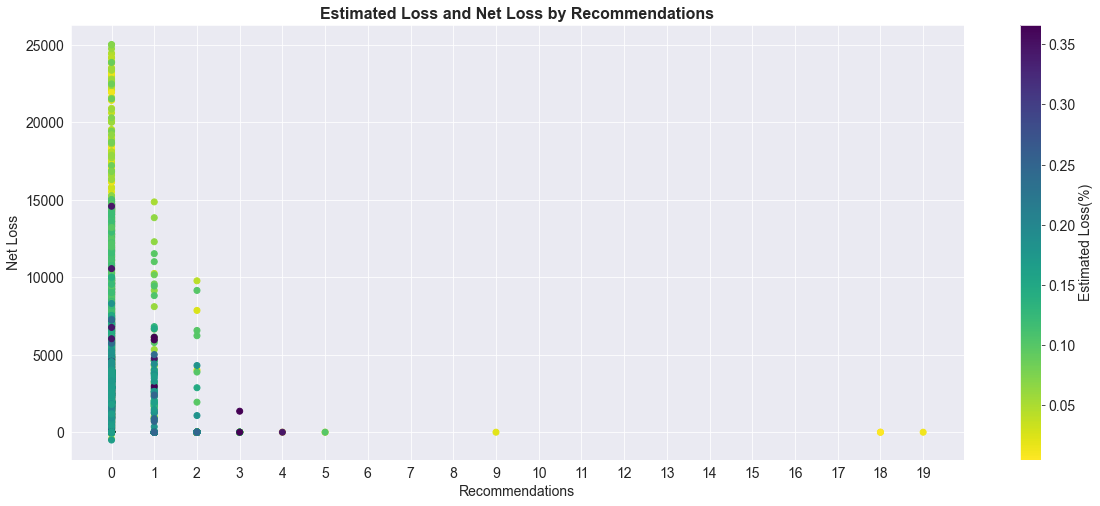

In [235]:
# plotting multivariate scatterplot
ticks = np.arange(0, 20, 1)
plt.figure(figsize = [20, 8])
plt.scatter(data = ploan, x = 'recommendations', y = 'lp_netprincipalloss', c = 'estimatedloss', cmap = 'viridis_r')
plt.colorbar(label = 'Estimated Loss(%)')
plt.xticks(ticks, ticks)

# title and labels
titles('Estimated Loss and Net Loss by Recommendations', 'Recommendations', 'Net Loss')
plt.show;

Regardless of the estimates, recommendations are observed to limit the losses made by the Prosper. No loss is noticed on loans with recommendations from 4 or more people.

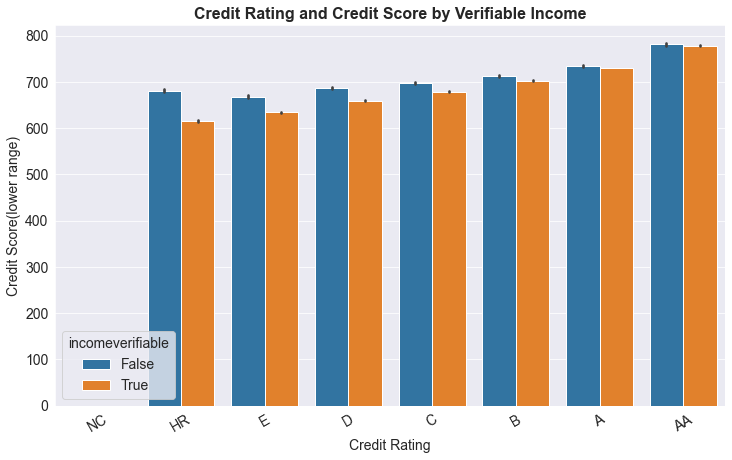

In [236]:
# plotting a clustered barplot
plt.figure(figsize = [12, 7])
sb.barplot(data = ploan, x = 'credit_rating', y = 'creditscorerangelower', hue = 'incomeverifiable')
plt.xticks(rotation = 30)

# title and labels
titles('Credit Rating and Credit Score by Verifiable Income', 'Credit Rating', 'Credit Score(lower range)')
plt.show;

It is observed that those who didn't have their source of income verified (in a credit_rating)had to have higher credit score when compared to verified people in the same credit rating.
Also, the difference between the credit scores of the unverified and verified reduced with increasing credit ratings with AA almost having no difference.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


The features `credit_rating`, `listingcategory`, and `recommendations` helped in clarifing and understanding the main features of interest.

Credit_rating helped in understanding how prosper distributed Annual Percentage Rate amongst borrowers and how estimated loss was calculated; Listing Category showed why people borrowed and helped uncover that most losses were made from borrowers who collected to consolidate debts; endorsemnts from people actually mattered in terms of range of losses made by prosper.

### Were there any interesting or surprising interactions between features?
Some interesting things to note include:
* More caution being taken by Prosper on borrowers with low credit rating which in turn reduces losses and less caution taken on borrowers with high credit rating thereby causing the company a higher range of losses.

* Lots of loans resulting in losses being borrowed to consolidate debts.

* Borrowers who didn't have their source of income verified (in a credit rating) had to have higher credit score when compared to verified people in the same credit rating.


<a id = 'conclusions'></a>
## Conclusions

For the analysis, 26 features were extracted from the 81 available columns after cleaning was done.

### Insights
>* Low borrower APR and low loss estimates are highly associated/assigned to borrowers with high credit ratings.
>* We can infer more gain is made from loans to high risk borrowers since profit is gotten from fees included in borrower APR. 
>* Borrowers with low loss estimates could get higher amounts loaned to them, with investors more drawn to fund their loans.
>* A large proportion of loans taken before the model change in 2009 resulted in losses. These losses were mainly made via defaults and mostly made from loans to high risk(HR) and NC borrowers. Also, people with high credit rating and low estimated loss account for loans with the highest amount lost(reaching up to $\$$25k).
>* The number of delinquents increased with decreasing credit ratings.
>* Recommendations did not really affect investors willingness to fund loans, but with more recommendations, losses seemed to be smaller.

### Limitations
>* Absence of data before or discontinuation of data after 2009 in some features such as estimated loss and prosper score.
>* The presence of many features made for a bloated dataset.

In [237]:
!jupyter nbconvert Part_I_exploration_Project.ipynb --to slides --no-input

[NbConvertApp] Converting notebook Part_I_exploration_Project.ipynb to slides
[NbConvertApp] Writing 3992304 bytes to Part_I_exploration_Project.slides.html
